In [1]:
# ============================================================================
# CELL 1: Import Libraries
# ============================================================================
"""
Heart Disease Prediction - Comprehensive Analysis
Dataset: heart.csv (1,025 patient records)
Author: [Your Name]
Date: 2026-01-05

This notebook performs end-to-end machine learning pipeline for predicting
heart disease based on medical indicators.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)
from sklearn.dummy import DummyClassifier

import xgboost as xgb
import joblib

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ All libraries imported successfully!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")

✅ All libraries imported successfully!
📦 Pandas version: 2.2.2
📦 NumPy version: 2.0.2


In [2]:
# ============================================================================
# CELL 2: Load Dataset
# ============================================================================
"""
Load the Heart Disease dataset
Dataset: heart.csv (1,025 patient records, 14 columns)
Source: https://github.com/dataops95/ml-zoomcamp-homeworks-2025/blob/main/capstone1/data/heart.csv
"""

# Load from local file
df = pd.read_csv('data/heart.csv')

print("✅ Dataset loaded successfully!")
print(f"\n📊 Dataset shape: {df.shape}")
print(f"   Number of samples: {df.shape[0]}")
print(f"   Number of features: {df.shape[1]}")

# Display column names
print(f"\n📋 Column names:")
print(df.columns.tolist())

✅ Dataset loaded successfully!

📊 Dataset shape: (1025, 14)
   Number of samples: 1025
   Number of features: 14

📋 Column names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [3]:
# ============================================================================
# CELL 3: Initial Data Exploration
# ============================================================================
"""
Quick overview of the dataset structure
"""

print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)

# First rows
print("\n📊 First 10 rows:")
display(df.head(10))

print("\n📊 Last 5 rows:")
display(df.tail())

# Random sample
print("\n📊 Random sample (5 rows):")
display(df.sample(5, random_state=42))

# Data types and non-null counts
print("\n📋 Dataset Info:")
df.info()

DATASET OVERVIEW

📊 First 10 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0



📊 Last 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0



📊 Random sample (5 rows):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# ============================================================================
# CELL 4: Feature Description
# ============================================================================
"""
Understanding each feature in the dataset
"""

feature_descriptions = {
    'age': 'Age in years (29-77)',
    'sex': 'Sex (1 = male; 0 = female)',
    'cp': 'Chest pain type (0=typical angina, 1=atypical angina, 2=non-anginal, 3=asymptomatic)',
    'trestbps': 'Resting blood pressure in mm Hg (on admission to hospital)',
    'chol': 'Serum cholesterol in mg/dl',
    'fbs': 'Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)',
    'restecg': 'Resting electrocardiographic results (0=normal, 1=ST-T abnormality, 2=LV hypertrophy)',
    'thalach': 'Maximum heart rate achieved (bpm)',
    'exang': 'Exercise induced angina (1 = yes; 0 = no)',
    'oldpeak': 'ST depression induced by exercise relative to rest',
    'slope': 'Slope of peak exercise ST segment (0=upsloping, 1=flat, 2=downsloping)',
    'ca': 'Number of major vessels (0-4) colored by fluoroscopy',
    'thal': 'Thalassemia (0=unknown, 1=normal, 2=fixed defect, 3=reversible defect)',
    'target': 'Heart disease diagnosis (1 = disease; 0 = no disease)'
}

print("=" * 80)
print("FEATURE DESCRIPTIONS")
print("=" * 80)
for feature, description in feature_descriptions.items():
    print(f"• {feature:12s}: {description}")

FEATURE DESCRIPTIONS
• age         : Age in years (29-77)
• sex         : Sex (1 = male; 0 = female)
• cp          : Chest pain type (0=typical angina, 1=atypical angina, 2=non-anginal, 3=asymptomatic)
• trestbps    : Resting blood pressure in mm Hg (on admission to hospital)
• chol        : Serum cholesterol in mg/dl
• fbs         : Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
• restecg     : Resting electrocardiographic results (0=normal, 1=ST-T abnormality, 2=LV hypertrophy)
• thalach     : Maximum heart rate achieved (bpm)
• exang       : Exercise induced angina (1 = yes; 0 = no)
• oldpeak     : ST depression induced by exercise relative to rest
• slope       : Slope of peak exercise ST segment (0=upsloping, 1=flat, 2=downsloping)
• ca          : Number of major vessels (0-4) colored by fluoroscopy
• thal        : Thalassemia (0=unknown, 1=normal, 2=fixed defect, 3=reversible defect)
• target      : Heart disease diagnosis (1 = disease; 0 = no disease)


In [5]:
# ============================================================================
# CELL 5: Statistical Summary
# ============================================================================
"""
Statistical summary of numerical features
"""

print("=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)

# Descriptive statistics
print("\n📈 Numerical Features Statistics:")
display(df.describe().T.style.background_gradient(cmap='RdYlGn', axis=0))

print("\n📊 Categorical Features Value Counts:")
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        value_counts = df[col].value_counts().sort_index()
        for val, count in value_counts.items():
            pct = count / len(df) * 100
            print(f"  {val}: {count:4d} ({pct:5.1f}%)")

STATISTICAL SUMMARY

📈 Numerical Features Statistics:


,count,mean,std,min,25%,50%,75%,max
age,1025.000000,54.434146,9.072290,29.000000,48.000000,56.000000,61.000000,77.000000
sex,1025.000000,0.695610,0.460373,0.000000,0.000000,1.000000,1.000000,1.000000
cp,1025.000000,0.942439,1.029641,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,1025.000000,131.611707,17.516718,94.000000,120.000000,130.000000,140.000000,200.000000
chol,1025.000000,246.000000,51.592510,126.000000,211.000000,240.000000,275.000000,564.000000
fbs,1025.000000,0.149268,0.356527,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,1025.000000,0.529756,0.527878,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,1025.000000,149.114146,23.005724,71.000000,132.000000,152.000000,166.000000,202.000000
exang,1025.000000,0.336585,0.472772,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,1025.000000,1.071512,1.175053,0.000000,0.000000,0.800000,1.800000,6.200000



📊 Categorical Features Value Counts:

SEX:
  0:  312 ( 30.4%)
  1:  713 ( 69.6%)

CP:
  0:  497 ( 48.5%)
  1:  167 ( 16.3%)
  2:  284 ( 27.7%)
  3:   77 (  7.5%)

FBS:
  0:  872 ( 85.1%)
  1:  153 ( 14.9%)

RESTECG:
  0:  497 ( 48.5%)
  1:  513 ( 50.0%)
  2:   15 (  1.5%)

EXANG:
  0:  680 ( 66.3%)
  1:  345 ( 33.7%)

SLOPE:
  0:   74 (  7.2%)
  1:  482 ( 47.0%)
  2:  469 ( 45.8%)

CA:
  0:  578 ( 56.4%)
  1:  226 ( 22.0%)
  2:  134 ( 13.1%)
  3:   69 (  6.7%)
  4:   18 (  1.8%)

THAL:
  0:    7 (  0.7%)
  1:   64 (  6.2%)
  2:  544 ( 53.1%)
  3:  410 ( 40.0%)

TARGET:
  0:  499 ( 48.7%)
  1:  526 ( 51.3%)


In [6]:
# ============================================================================
# CELL 6: Missing Values Analysis
# ============================================================================
"""
Check for missing values and data quality issues
"""

print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

# Missing values count
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percent': missing_percent
}).sort_values('Missing_Count', ascending=False)

print("\n🔍 Missing Values Summary:")
if missing_df['Missing_Count'].sum() == 0:
    print("✅ No missing values found! Data quality is excellent.")
else:
    print(missing_df[missing_df['Missing_Count'] > 0])
    print(f"\n⚠️ Total missing values: {missing_df['Missing_Count'].sum()}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔍 Duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"⚠️ Found {duplicates} duplicate rows.")
    print("First few duplicates:")
    display(df[df.duplicated(keep=False)].head(10))

    # Remove duplicates
    df = df.drop_duplicates()
    print(f"✅ Duplicates removed. New shape: {df.shape}")
else:
    print("✅ No duplicates detected!")

# Data quality checks
print(f"\n📊 Data Quality Checks:")
print(f"   Age range: {df['age'].min()}-{df['age'].max()} years")
print(f"   Blood pressure range: {df['trestbps'].min()}-{df['trestbps'].max()} mm Hg")
print(f"   Cholesterol range: {df['chol'].min()}-{df['chol'].max()} mg/dl")
print(f"   Max heart rate range: {df['thalach'].min()}-{df['thalach'].max()} bpm")

# Check for outliers/invalid values
invalid_chol = (df['chol'] == 0).sum()
invalid_bp = (df['trestbps'] == 0).sum()

if invalid_chol > 0 or invalid_bp > 0:
    print(f"\n⚠️ Data quality issues:")
    if invalid_chol > 0:
        print(f"   Cholesterol = 0: {invalid_chol} cases (measurement error?)")
    if invalid_bp > 0:
        print(f"   Blood pressure = 0: {invalid_bp} cases (measurement error?)")
else:
    print(f"\n✅ No obvious data quality issues detected")

MISSING VALUES ANALYSIS

🔍 Missing Values Summary:
✅ No missing values found! Data quality is excellent.

🔍 Duplicate rows: 723
⚠️ Found 723 duplicate rows.
First few duplicates:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


✅ Duplicates removed. New shape: (302, 14)

📊 Data Quality Checks:
   Age range: 29-77 years
   Blood pressure range: 94-200 mm Hg
   Cholesterol range: 126-564 mg/dl
   Max heart rate range: 71-202 bpm

✅ No obvious data quality issues detected


TARGET VARIABLE ANALYSIS

🎯 Target Variable Distribution:
   No Disease (0): 138 samples (45.7%)
   Disease (1):    164 samples (54.3%)

📊 Class Balance:
   Ratio (min/max): 0.84
   ✅ Dataset is well-balanced! (ratio > 0.8)


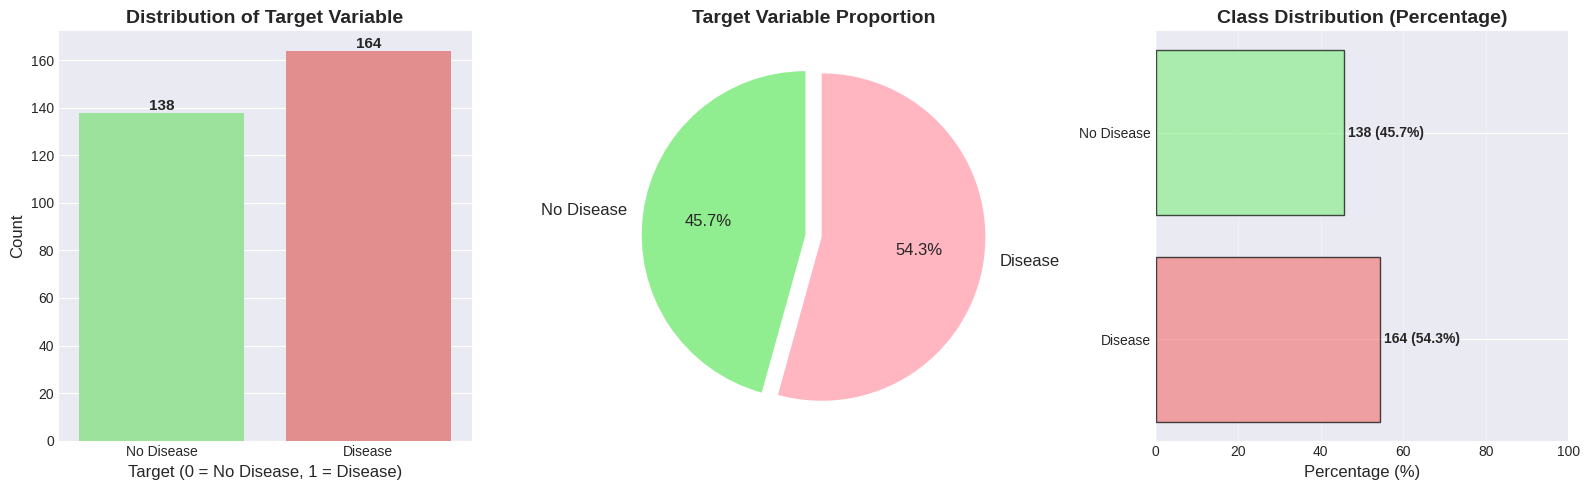

In [7]:
# ============================================================================
# CELL 7: Target Variable Analysis
# ============================================================================
"""
Analyze the distribution of the target variable (class balance)
"""

print("=" * 80)
print("TARGET VARIABLE ANALYSIS")
print("=" * 80)

# Class distribution
target_counts = df['target'].value_counts().sort_index()
target_percent = (target_counts / len(df)) * 100

print("\n🎯 Target Variable Distribution:")
print(f"   No Disease (0): {target_counts[0]} samples ({target_percent[0]:.1f}%)")
print(f"   Disease (1):    {target_counts[1]} samples ({target_percent[1]:.1f}%)")

# Calculate imbalance ratio
imbalance_ratio = target_counts[0] / target_counts[1] if target_counts[1] > target_counts[0] else target_counts[1] / target_counts[0]
print(f"\n📊 Class Balance:")
print(f"   Ratio (min/max): {imbalance_ratio:.2f}")

if imbalance_ratio > 0.8:
    print(f"   ✅ Dataset is well-balanced! (ratio > 0.8)")
elif imbalance_ratio > 0.5:
    print(f"   ⚠️ Minor imbalance. Consider stratified sampling.")
else:
    print(f"   ⚠️ Significant imbalance! Consider SMOTE or class weights.")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Count plot
sns.countplot(x='target', data=df, ax=axes[0], palette=['lightgreen', 'lightcoral'])
axes[0].set_title('Distribution of Target Variable', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Target (0 = No Disease, 1 = Disease)', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['No Disease', 'Disease'])

# Add counts on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fontsize=11, fontweight='bold')

# Pie chart
colors = ['#90EE90', '#FFB6C1']
axes[1].pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12}, explode=(0.05, 0.05))
axes[1].set_title('Target Variable Proportion', fontsize=14, fontweight='bold')

# Percentage bar chart
axes[2].barh(['Disease', 'No Disease'], [target_percent[1], target_percent[0]],
            color=['lightcoral', 'lightgreen'], edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Percentage (%)', fontsize=12)
axes[2].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[2].set_xlim([0, 100])
axes[2].grid(axis='x', alpha=0.3)

# Add percentage labels
for i, (val, pct) in enumerate(zip([target_counts[1], target_counts[0]], [target_percent[1], target_percent[0]])):
    axes[2].text(pct + 1, i, f'{val} ({pct:.1f}%)', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

UNIVARIATE ANALYSIS - NUMERICAL FEATURES


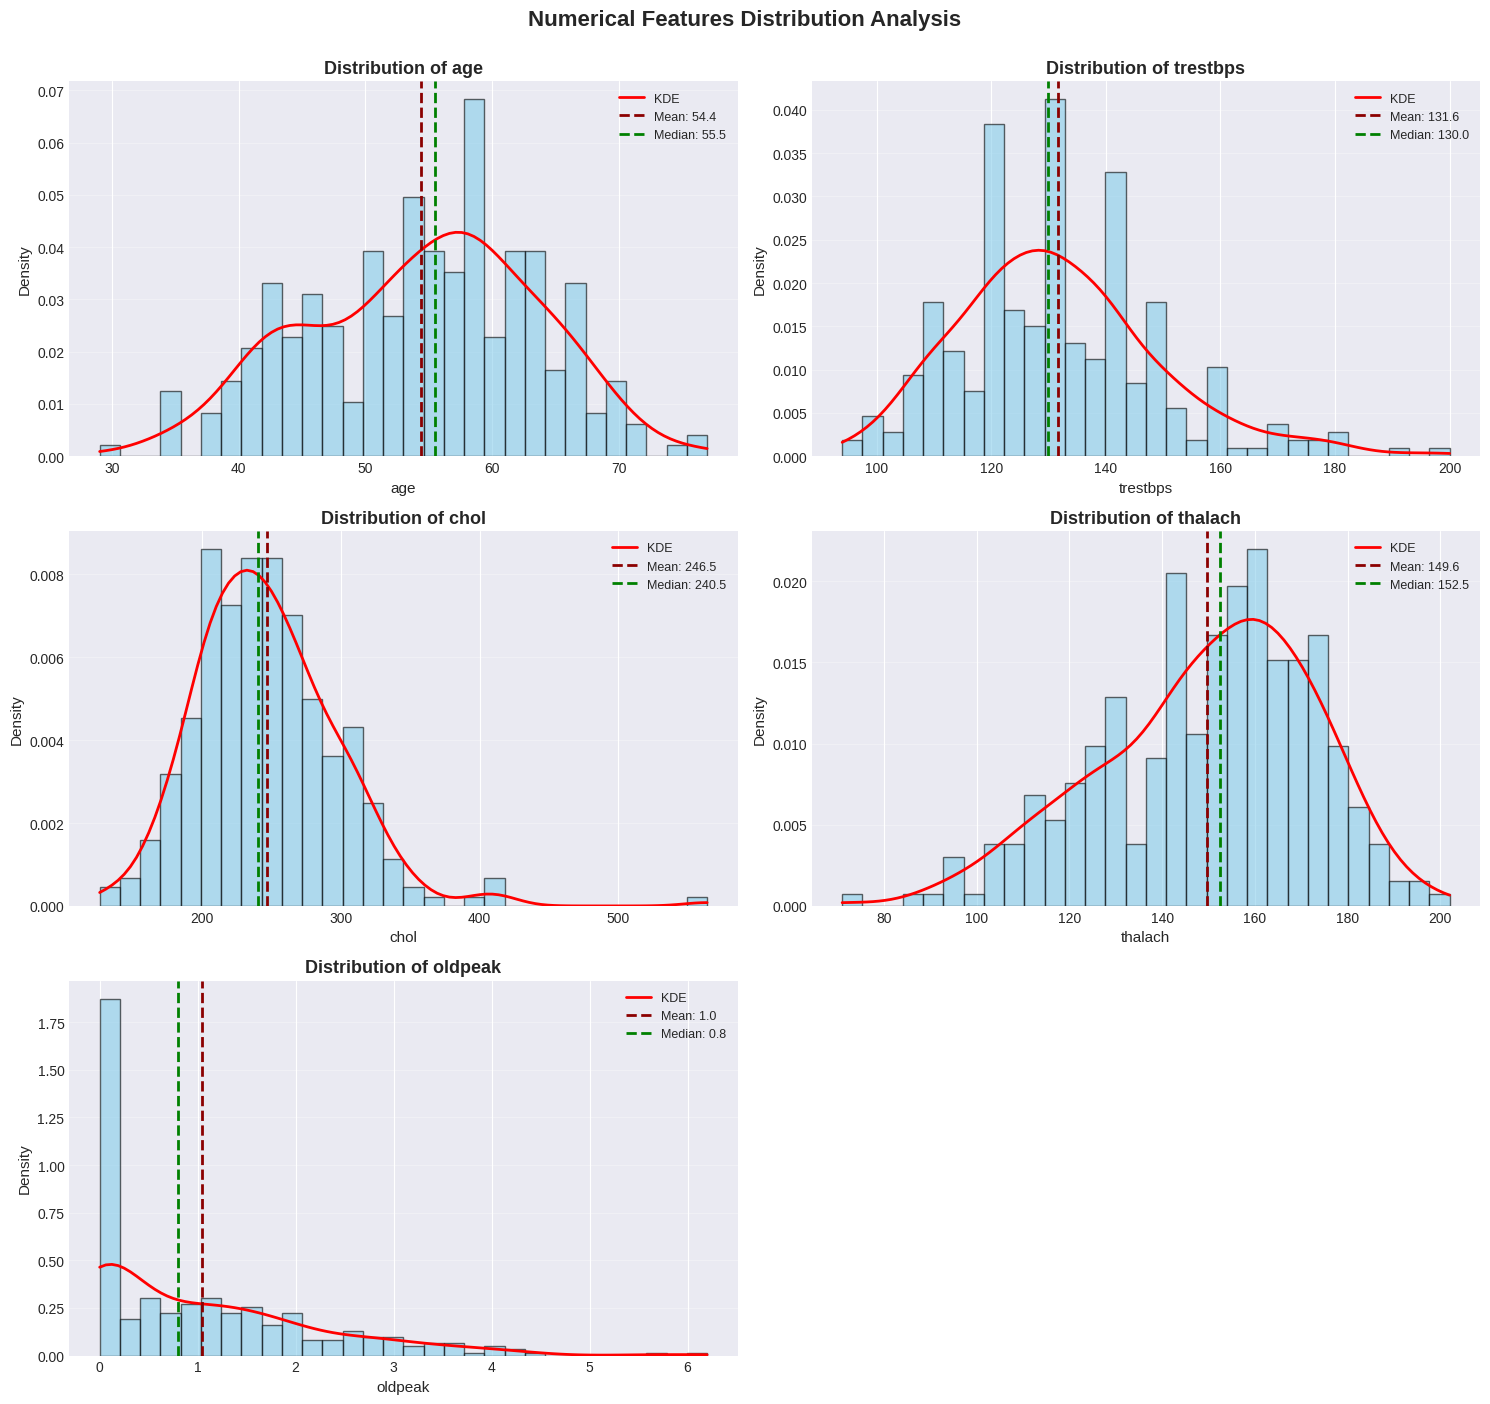


📊 Distribution Statistics:
Feature      Mean     Median   Std      Skewness   Kurtosis   Shape               
------------------------------------------------------------------------------------------
age          54.4     55.5     9.0      -0.204     -0.528     Fairly Symmetric    
trestbps     131.6    130.0    17.6     0.717      0.923      Moderately Skewed   
chol         246.5    240.5    51.8     1.147      4.543      Highly Skewed       
thalach      149.6    152.5    22.9     -0.533     -0.062     Moderately Skewed   
oldpeak      1.0      0.8      1.2      1.266      1.568      Highly Skewed       


In [8]:
# ============================================================================
# CELL 8: Univariate Analysis - Numerical Features
# ============================================================================
"""
Distribution analysis of numerical features
"""

print("=" * 80)
print("UNIVARIATE ANALYSIS - NUMERICAL FEATURES")
print("=" * 80)

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(3, 2, figsize=(15, 14))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    # Histogram with KDE
    axes[idx].hist(df[feature], bins=30, alpha=0.6, color='skyblue', edgecolor='black', density=True)

    # Add KDE curve
    from scipy import stats
    kde = stats.gaussian_kde(df[feature].dropna())
    x_range = np.linspace(df[feature].min(), df[feature].max(), 100)
    axes[idx].plot(x_range, kde(x_range), color='red', linewidth=2, label='KDE')

    # Add mean and median lines
    mean_val = df[feature].mean()
    median_val = df[feature].median()

    axes[idx].axvline(mean_val, color='darkred', linestyle='--', linewidth=2,
                     label=f'Mean: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2,
                     label=f'Median: {median_val:.1f}')

    axes[idx].set_title(f'Distribution of {feature}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Density', fontsize=11)
    axes[idx].legend(fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplot
axes[-1].axis('off')

plt.suptitle('Numerical Features Distribution Analysis', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Statistical tests for normality
print("\n📊 Distribution Statistics:")
print(f"{'Feature':<12} {'Mean':<8} {'Median':<8} {'Std':<8} {'Skewness':<10} {'Kurtosis':<10} {'Shape':<20}")
print("-" * 90)

for feature in numerical_features:
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    std_val = df[feature].std()
    skewness = df[feature].skew()
    kurtosis = df[feature].kurtosis()

    # Determine shape
    if abs(skewness) < 0.5:
        shape = "Fairly Symmetric"
    elif abs(skewness) < 1:
        shape = "Moderately Skewed"
    else:
        shape = "Highly Skewed"

    print(f"{feature:<12} {mean_val:<8.1f} {median_val:<8.1f} {std_val:<8.1f} {skewness:<10.3f} {kurtosis:<10.3f} {shape:<20}")

UNIVARIATE ANALYSIS - CATEGORICAL FEATURES


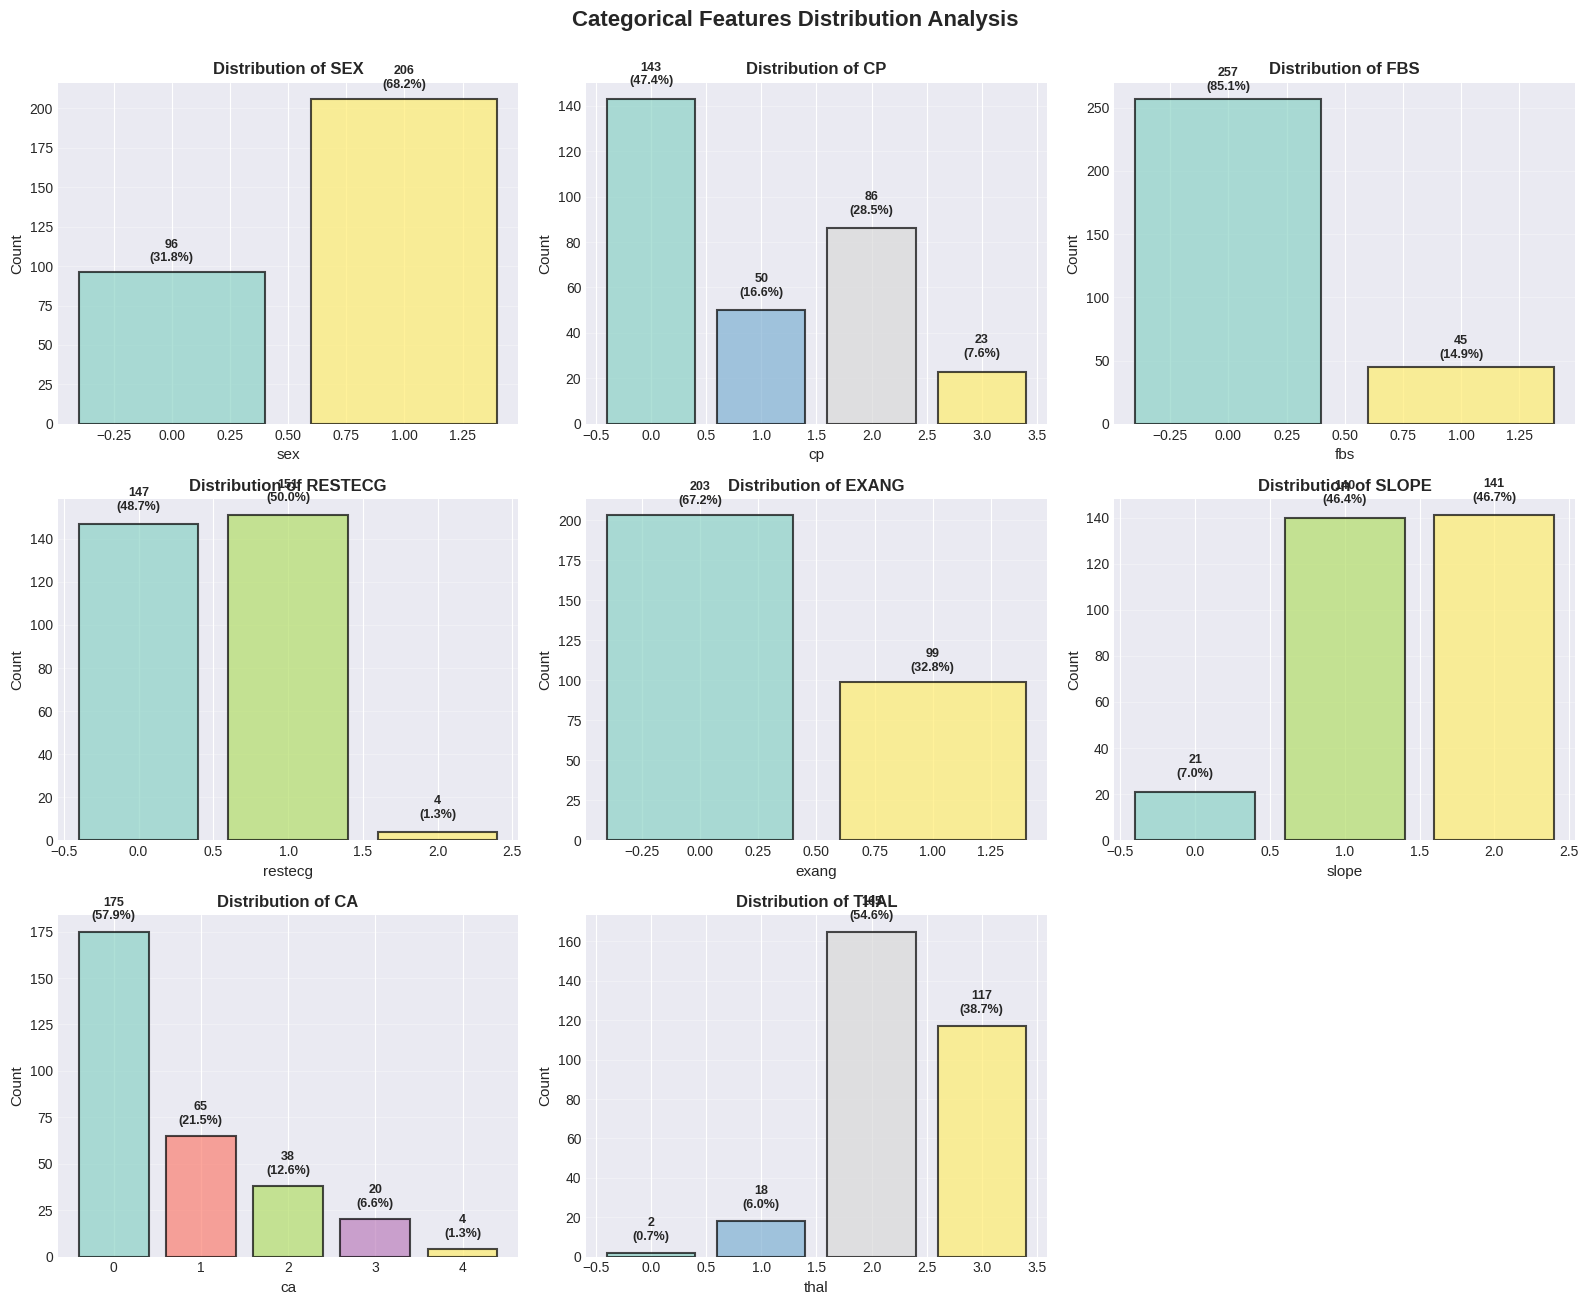

In [9]:
# ============================================================================
# CELL 9: Univariate Analysis - Categorical Features
# ============================================================================
"""
Distribution analysis of categorical features
"""

print("=" * 80)
print("UNIVARIATE ANALYSIS - CATEGORICAL FEATURES")
print("=" * 80)

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(3, 3, figsize=(16, 13))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    if feature in df.columns:
        value_counts = df[feature].value_counts().sort_index()
        colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))

        bars = axes[idx].bar(value_counts.index, value_counts.values,
                            color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

        axes[idx].set_title(f'Distribution of {feature.upper()}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(feature, fontsize=11)
        axes[idx].set_ylabel('Count', fontsize=11)
        axes[idx].grid(axis='y', alpha=0.3)

        # Add value labels on bars
        for bar, val in zip(bars, value_counts.values):
            height = bar.get_height()
            pct = val / len(df) * 100
            axes[idx].text(bar.get_x() + bar.get_width()/2., height + 5,
                          f'{val}\n({pct:.1f}%)', ha='center', va='bottom',
                          fontweight='bold', fontsize=9)

# Hide extra subplot
axes[-1].axis('off')

plt.suptitle('Categorical Features Distribution Analysis', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS - NUMERICAL FEATURES vs TARGET


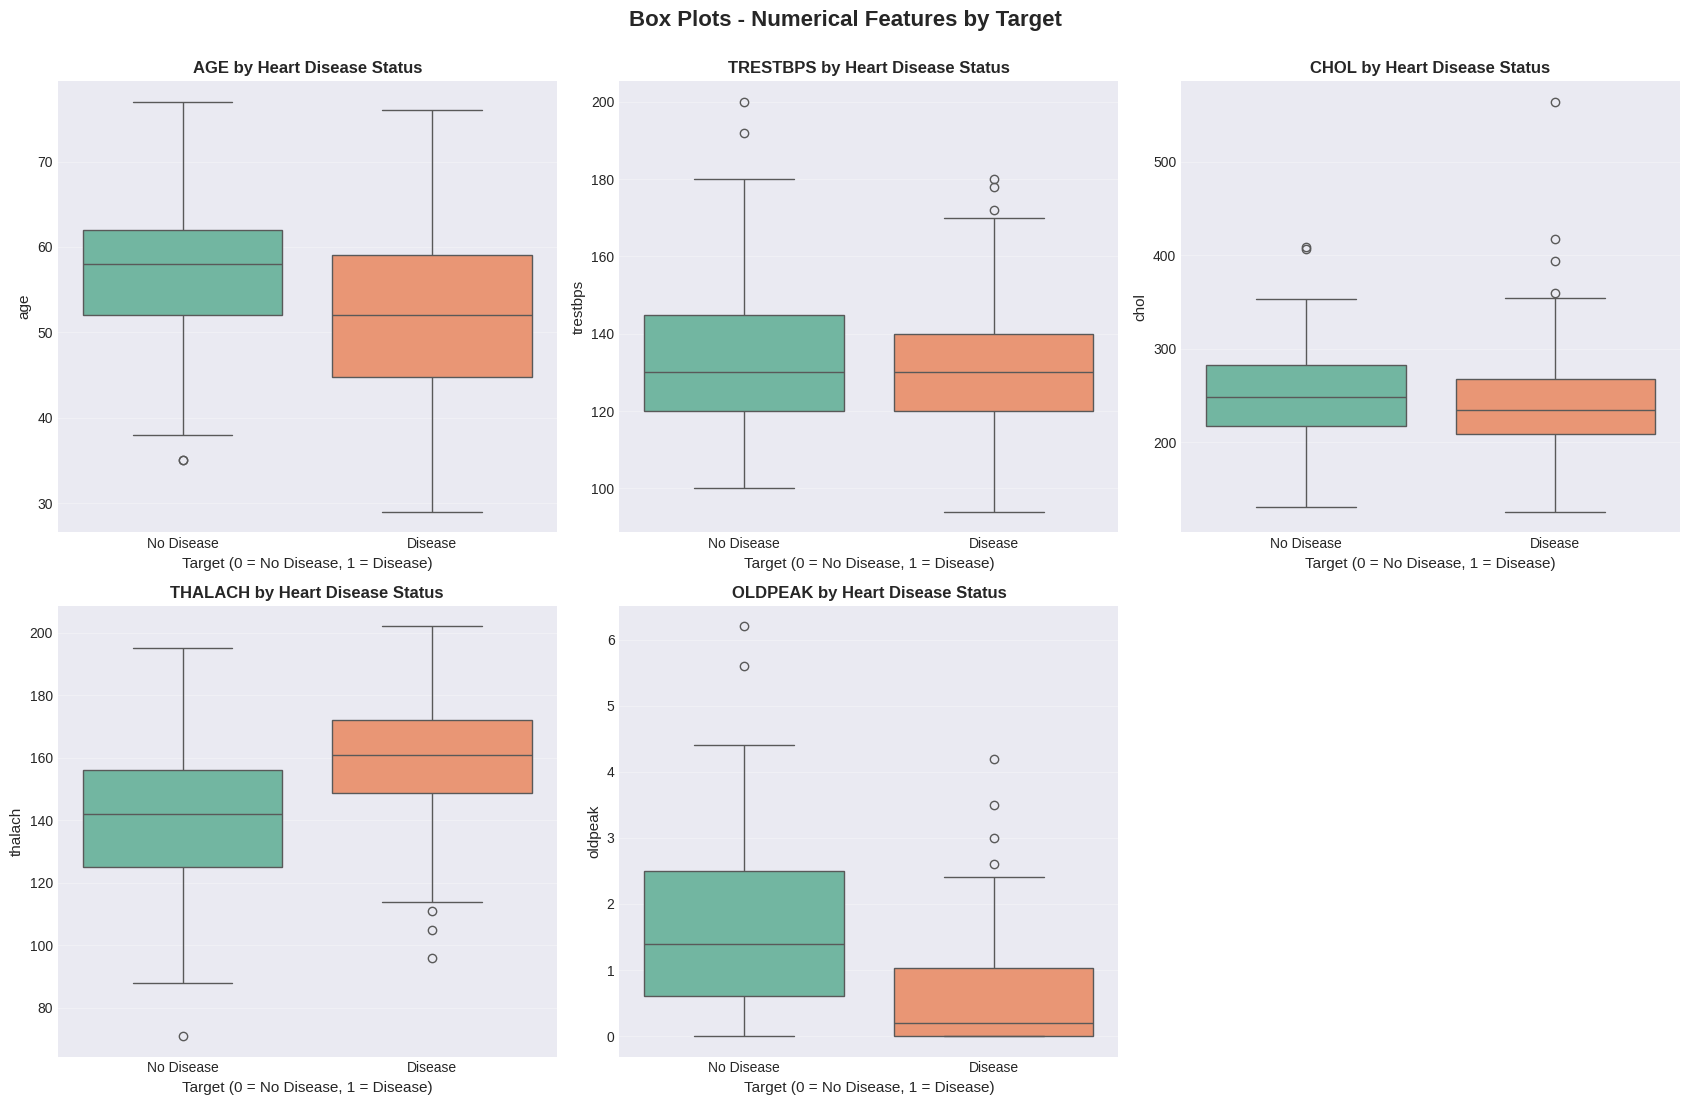

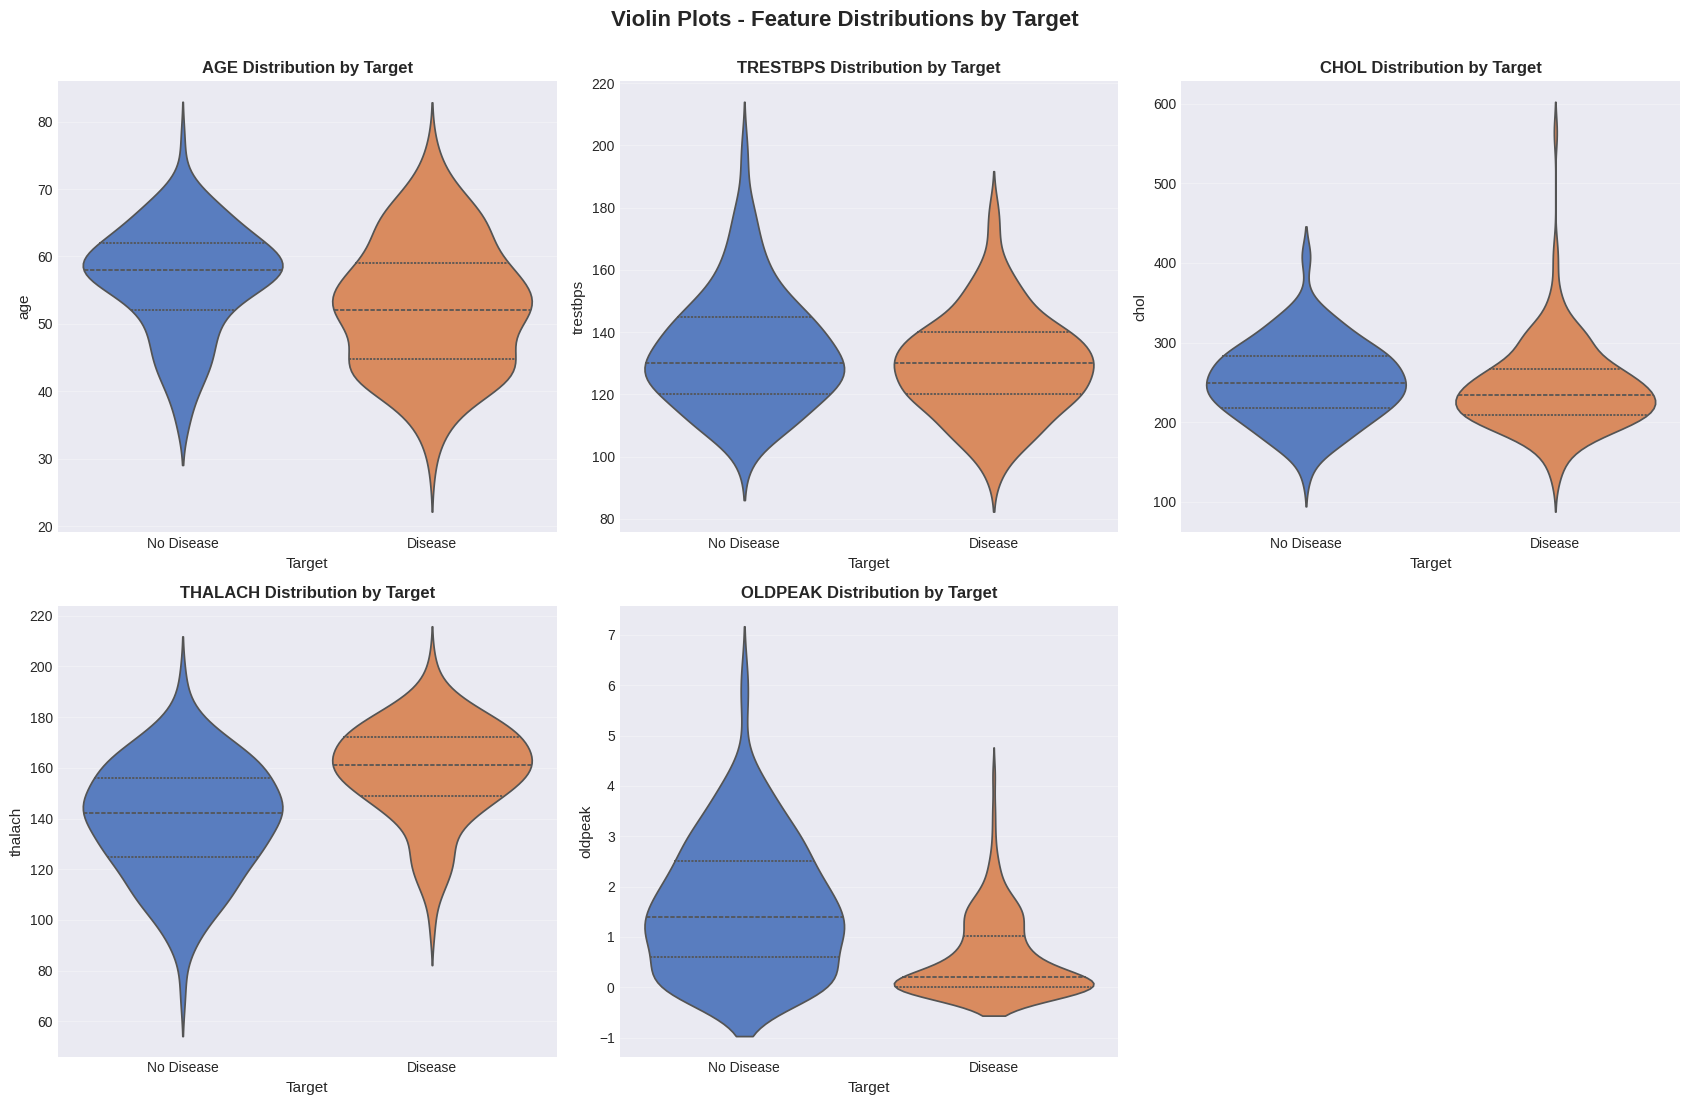


📊 Statistical Comparison by Target:

Mean Values:


,age,trestbps,chol,thalach,oldpeak
target,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507
1,52.585366,129.250000,242.640244,158.378049,0.586585



Median Values:


,age,trestbps,chol,thalach,oldpeak
target,,,,,
0,58.000000,130.000000,249.000000,142.000000,1.400000
1,52.000000,130.000000,234.500000,161.000000,0.200000



Standard Deviation:


,age,trestbps,chol,thalach,oldpeak
target,,,,,
0,7.962082,18.729944,49.454614,22.598782,1.300340
1,9.511957,16.204739,53.456580,19.199080,0.781734



📊 Statistical Significance (t-test):
Feature      t-statistic     p-value         Significant    
------------------------------------------------------------
age          3.9338          0.000104        Yes (p<0.05)   
trestbps     2.5610          0.010927        Yes (p<0.05)   
chol         1.4152          0.158037        No (p≥0.05)    
thalach      -8.0148         0.000000        Yes (p<0.05)   
oldpeak      8.2293          0.000000        Yes (p<0.05)   


In [10]:
# ============================================================================
# CELL 10: Bivariate Analysis - Numerical vs Target
# ============================================================================
"""
Analyze relationship between numerical features and target variable
"""

print("=" * 80)
print("BIVARIATE ANALYSIS - NUMERICAL FEATURES vs TARGET")
print("=" * 80)

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Box plots
fig, axes = plt.subplots(2, 3, figsize=(17, 11))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    sns.boxplot(x='target', y=feature, data=df, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{feature.upper()} by Heart Disease Status',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target (0 = No Disease, 1 = Disease)', fontsize=11)
    axes[idx].set_ylabel(feature, fontsize=11)
    axes[idx].set_xticklabels(['No Disease', 'Disease'])
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplot
axes[-1].axis('off')

plt.suptitle('Box Plots - Numerical Features by Target', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Violin plots
fig, axes = plt.subplots(2, 3, figsize=(17, 11))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    sns.violinplot(x='target', y=feature, data=df, ax=axes[idx], palette='muted', inner='quartile')
    axes[idx].set_title(f'{feature.upper()} Distribution by Target',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target', fontsize=11)
    axes[idx].set_ylabel(feature, fontsize=11)
    axes[idx].set_xticklabels(['No Disease', 'Disease'])
    axes[idx].grid(axis='y', alpha=0.3)

axes[-1].axis('off')

plt.suptitle('Violin Plots - Feature Distributions by Target', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Statistical comparison
print("\n📊 Statistical Comparison by Target:")
print("\nMean Values:")
mean_comparison = df.groupby('target')[numerical_features].mean()
display(mean_comparison.style.background_gradient(cmap='RdYlGn', axis=0))

print("\nMedian Values:")
median_comparison = df.groupby('target')[numerical_features].median()
display(median_comparison.style.background_gradient(cmap='RdYlGn', axis=0))

print("\nStandard Deviation:")
std_comparison = df.groupby('target')[numerical_features].std()
display(std_comparison.style.background_gradient(cmap='YlOrRd', axis=0))

# T-tests for significant differences
from scipy.stats import ttest_ind

print("\n📊 Statistical Significance (t-test):")
print(f"{'Feature':<12} {'t-statistic':<15} {'p-value':<15} {'Significant':<15}")
print("-" * 60)

for feature in numerical_features:
    no_disease = df[df['target'] == 0][feature]
    disease = df[df['target'] == 1][feature]

    t_stat, p_value = ttest_ind(no_disease, disease)
    significant = "Yes (p<0.05)" if p_value < 0.05 else "No (p≥0.05)"

    print(f"{feature:<12} {t_stat:<15.4f} {p_value:<15.6f} {significant:<15}")

In [11]:
# Statistical tests for normality
print("\n📊 Skewness Analysis:")
for feature in numerical_features:
    skewness = df[feature].skew()
    print(f"{feature:12s}: {skewness:6.3f} ", end='')
    if abs(skewness) < 0.5:
        print("(Fairly Symmetric)")
    elif abs(skewness) < 1:
        print("(Moderately Skewed)")
    else:
        print("(Highly Skewed)")


📊 Skewness Analysis:
age         : -0.204 (Fairly Symmetric)
trestbps    :  0.717 (Moderately Skewed)
chol        :  1.147 (Highly Skewed)
thalach     : -0.533 (Moderately Skewed)
oldpeak     :  1.266 (Highly Skewed)


UNIVARIATE ANALYSIS - CATEGORICAL FEATURES


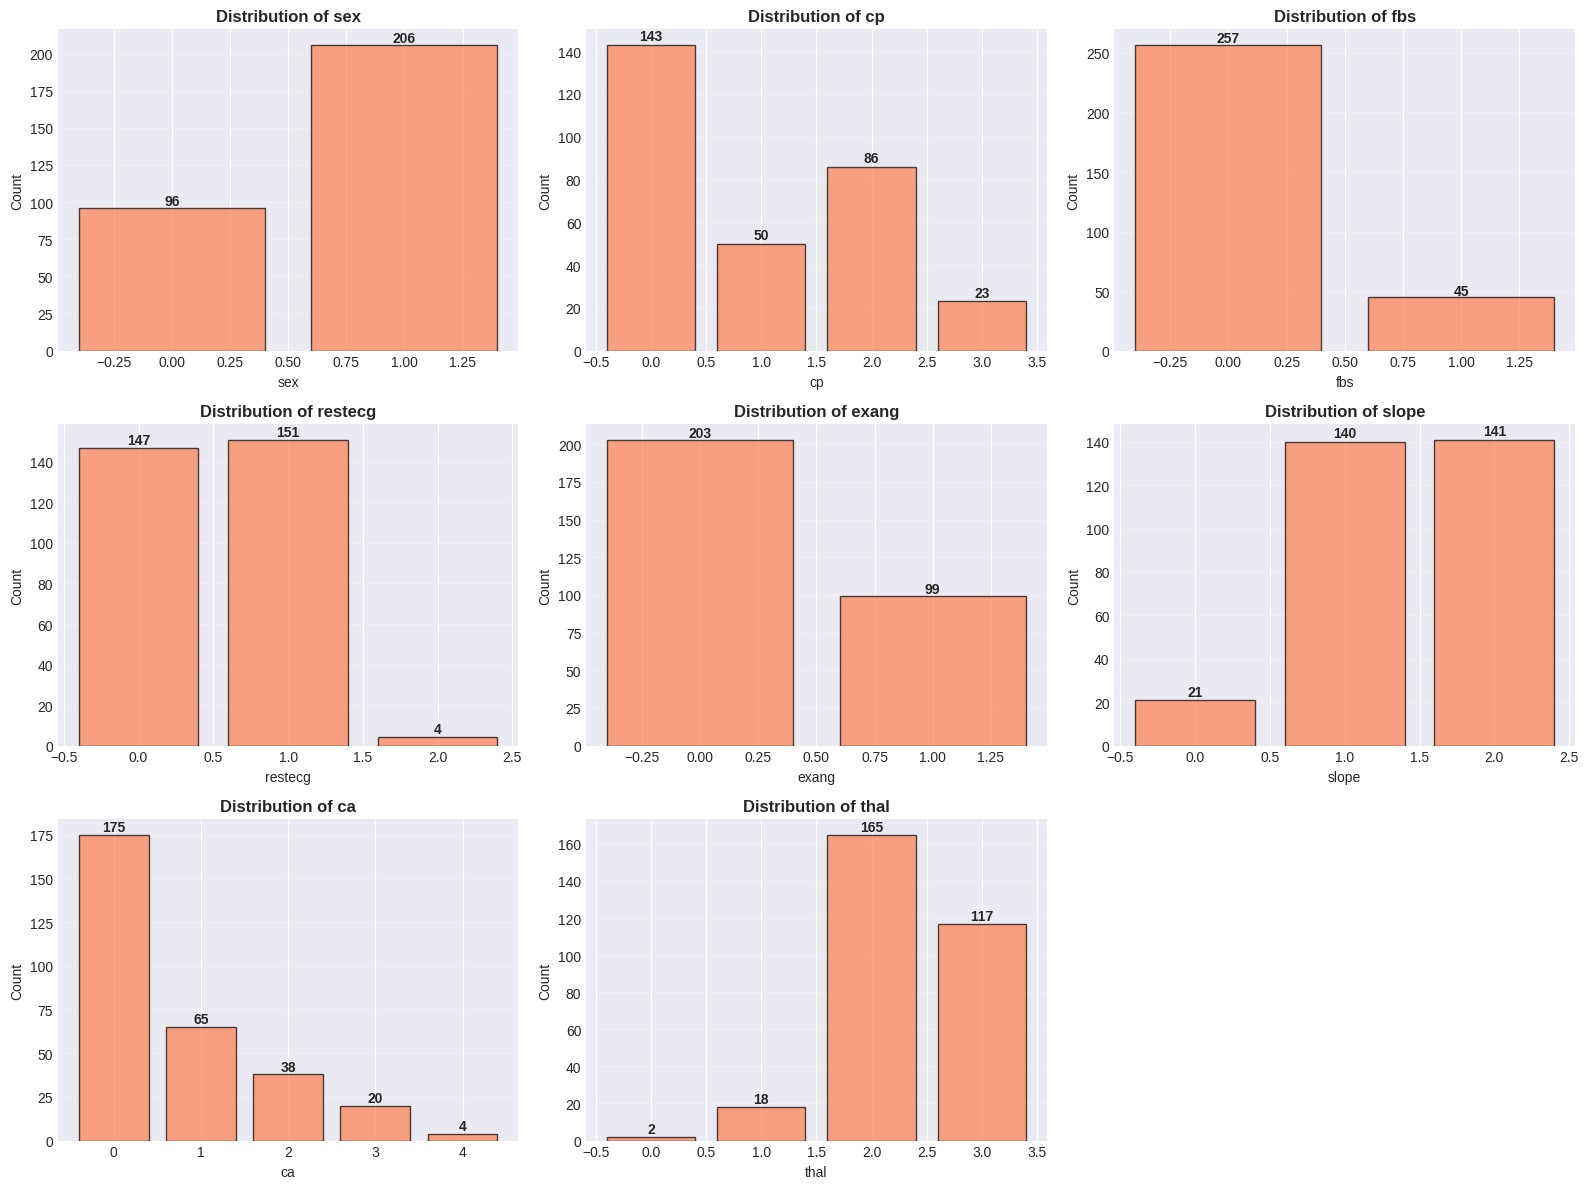

In [12]:
# ============================================================================
# CELL 11: Univariate Analysis - Categorical Features
# ============================================================================
"""
Distribution analysis of categorical features
"""

print("=" * 80)
print("UNIVARIATE ANALYSIS - CATEGORICAL FEATURES")
print("=" * 80)

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    if feature in df.columns:
        value_counts = df[feature].value_counts().sort_index()
        axes[idx].bar(value_counts.index, value_counts.values, color='coral', alpha=0.7, edgecolor='black')
        axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(feature, fontsize=10)
        axes[idx].set_ylabel('Count', fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)

        # Add value labels on bars
        for i, v in enumerate(value_counts.values):
            axes[idx].text(value_counts.index[i], v + 2, str(v), ha='center', fontweight='bold')

# Hide extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

BIVARIATE ANALYSIS - NUMERICAL FEATURES vs TARGET


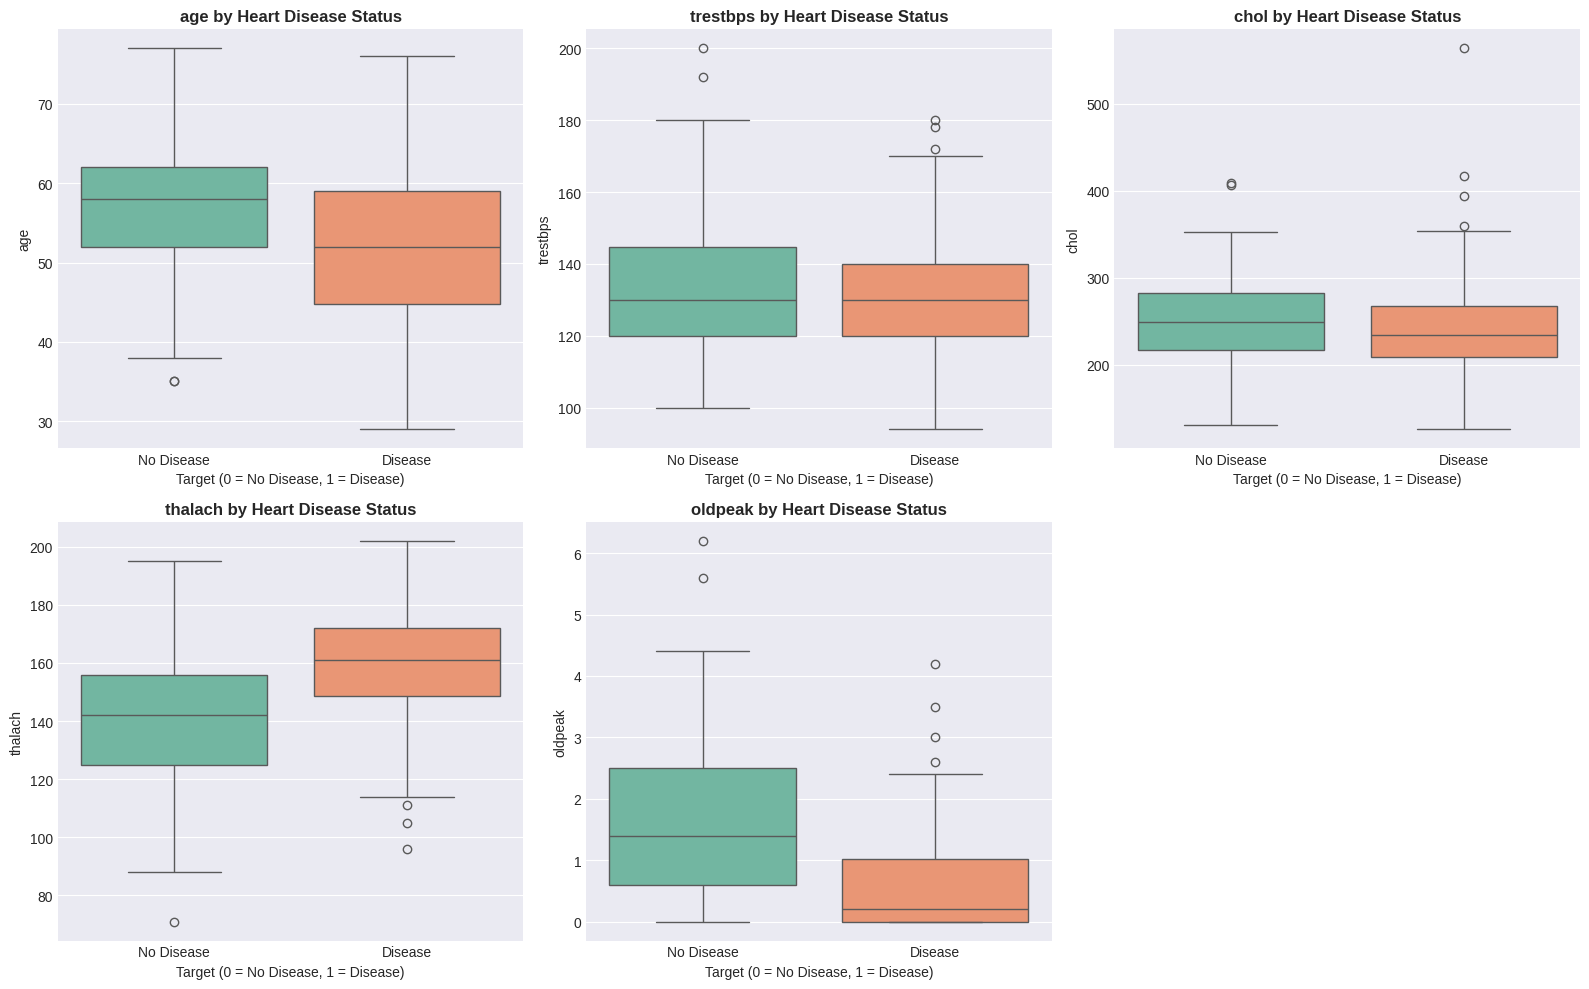

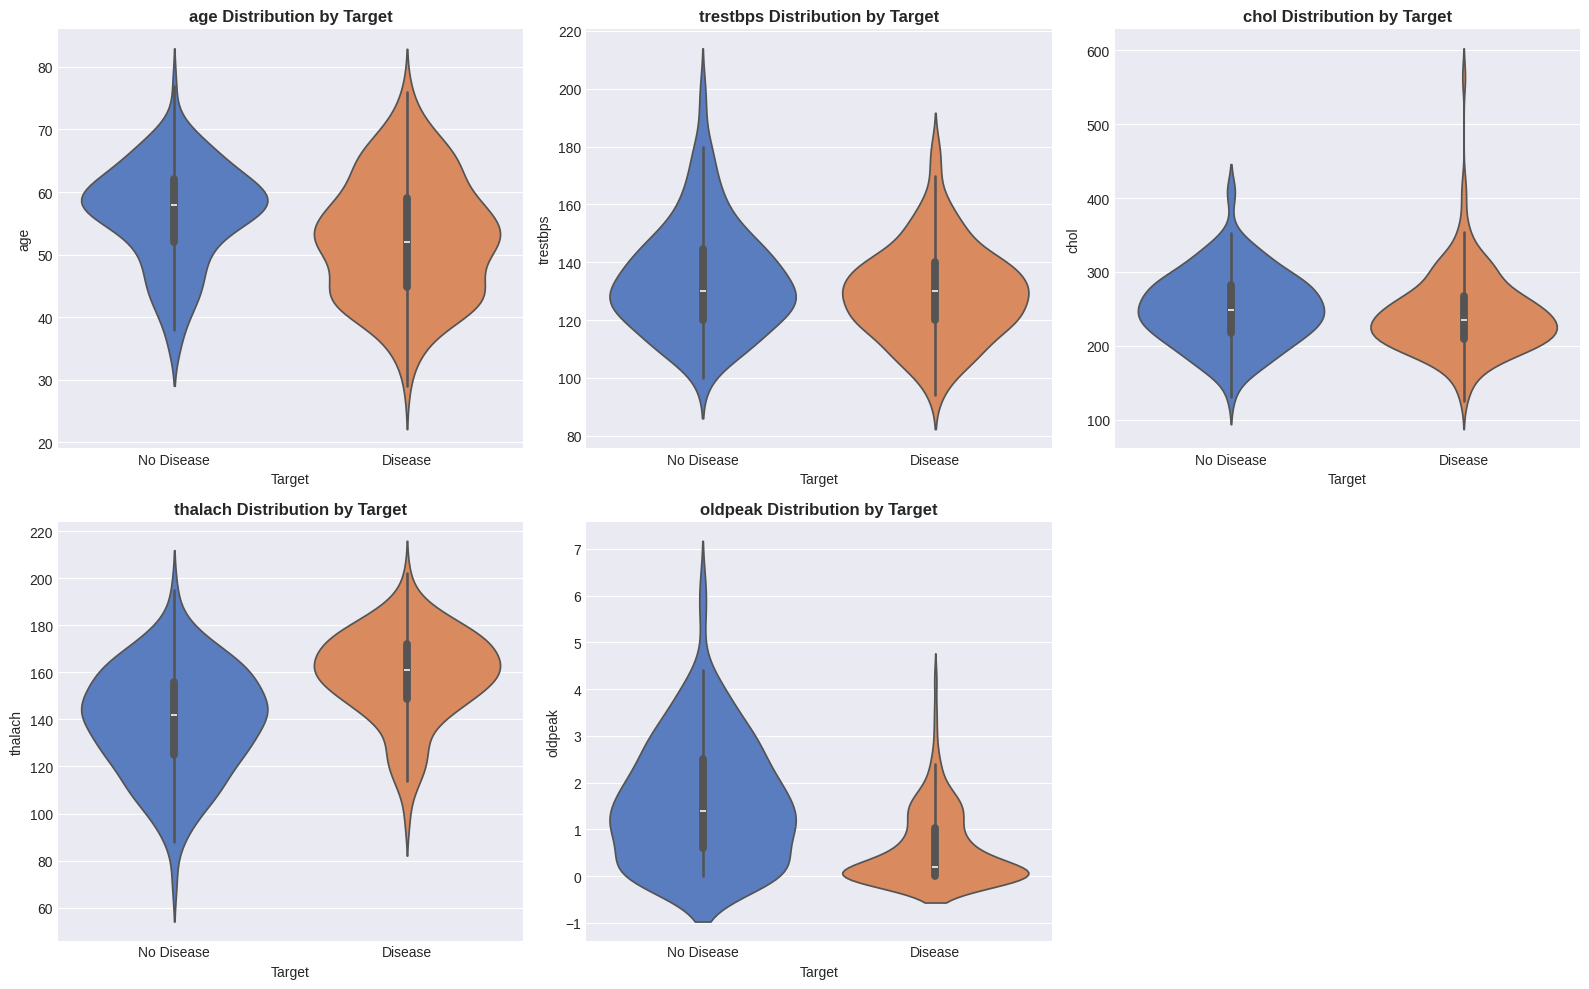


📊 Mean Values by Target:
          age  trestbps    chol  thalach  oldpeak
target                                           
0       56.60    134.40  251.09   139.10     1.59
1       52.59    129.25  242.64   158.38     0.59

📊 Median Values by Target:
         age  trestbps   chol  thalach  oldpeak
target                                         
0       58.0     130.0  249.0    142.0      1.4
1       52.0     130.0  234.5    161.0      0.2


In [13]:
# ============================================================================
# CELL 12: Bivariate Analysis - Numerical vs Target
# ============================================================================
"""
Analyze relationship between numerical features and target variable
"""

print("=" * 80)
print("BIVARIATE ANALYSIS - NUMERICAL FEATURES vs TARGET")
print("=" * 80)

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Box plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    sns.boxplot(x='target', y=feature, data=df, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{feature} by Heart Disease Status', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target (0 = No Disease, 1 = Disease)', fontsize=10)
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].set_xticklabels(['No Disease', 'Disease'])

# Hide extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Violin plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    sns.violinplot(x='target', y=feature, data=df, ax=axes[idx], palette='muted')
    axes[idx].set_title(f'{feature} Distribution by Target', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target', fontsize=10)
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].set_xticklabels(['No Disease', 'Disease'])

axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n📊 Mean Values by Target:")
print(df.groupby('target')[numerical_features].mean().round(2))

print("\n📊 Median Values by Target:")
print(df.groupby('target')[numerical_features].median().round(2))

BIVARIATE ANALYSIS - CATEGORICAL FEATURES vs TARGET


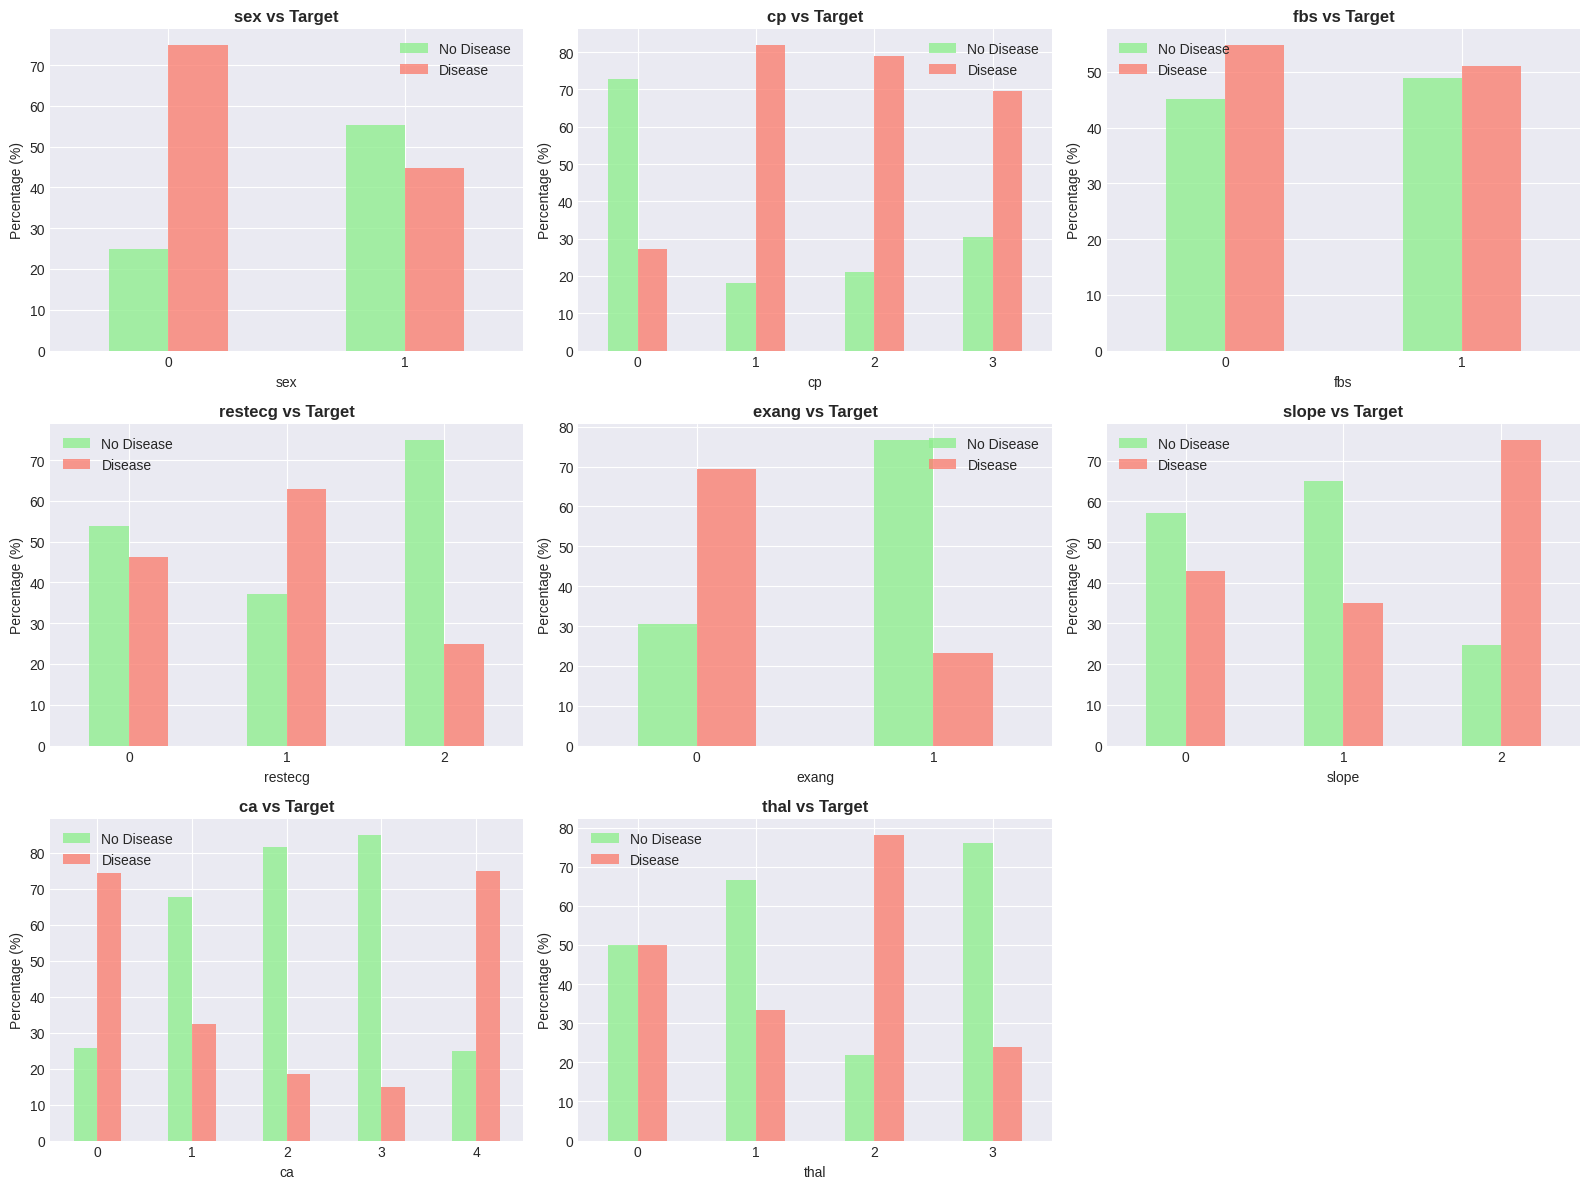


📊 Crosstab Analysis:

sex:
target    0    1  All
sex                  
0        24   72   96
1       114   92  206
All     138  164  302

cp:
target    0    1  All
cp                   
0       104   39  143
1         9   41   50
2        18   68   86
3         7   16   23
All     138  164  302

fbs:
target    0    1  All
fbs                  
0       116  141  257
1        22   23   45
All     138  164  302


In [14]:
# ============================================================================
# CELL 13: Bivariate Analysis - Categorical vs Target
# ============================================================================
"""
Analyze relationship between categorical features and target variable
"""

print("=" * 80)
print("BIVARIATE ANALYSIS - CATEGORICAL FEATURES vs TARGET")
print("=" * 80)

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    if feature in df.columns:
        ct = pd.crosstab(df[feature], df['target'], normalize='index') * 100
        ct.plot(kind='bar', ax=axes[idx], color=['lightgreen', 'salmon'], alpha=0.8)
        axes[idx].set_title(f'{feature} vs Target', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(feature, fontsize=10)
        axes[idx].set_ylabel('Percentage (%)', fontsize=10)
        axes[idx].legend(['No Disease', 'Disease'], loc='best')
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)

axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Crosstab with counts
print("\n📊 Crosstab Analysis:")
for feature in categorical_features[:3]:  # Show first 3 to save space
    if feature in df.columns:
        print(f"\n{feature}:")
        print(pd.crosstab(df[feature], df['target'], margins=True))

CORRELATION ANALYSIS

📊 Correlation with Target:
target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


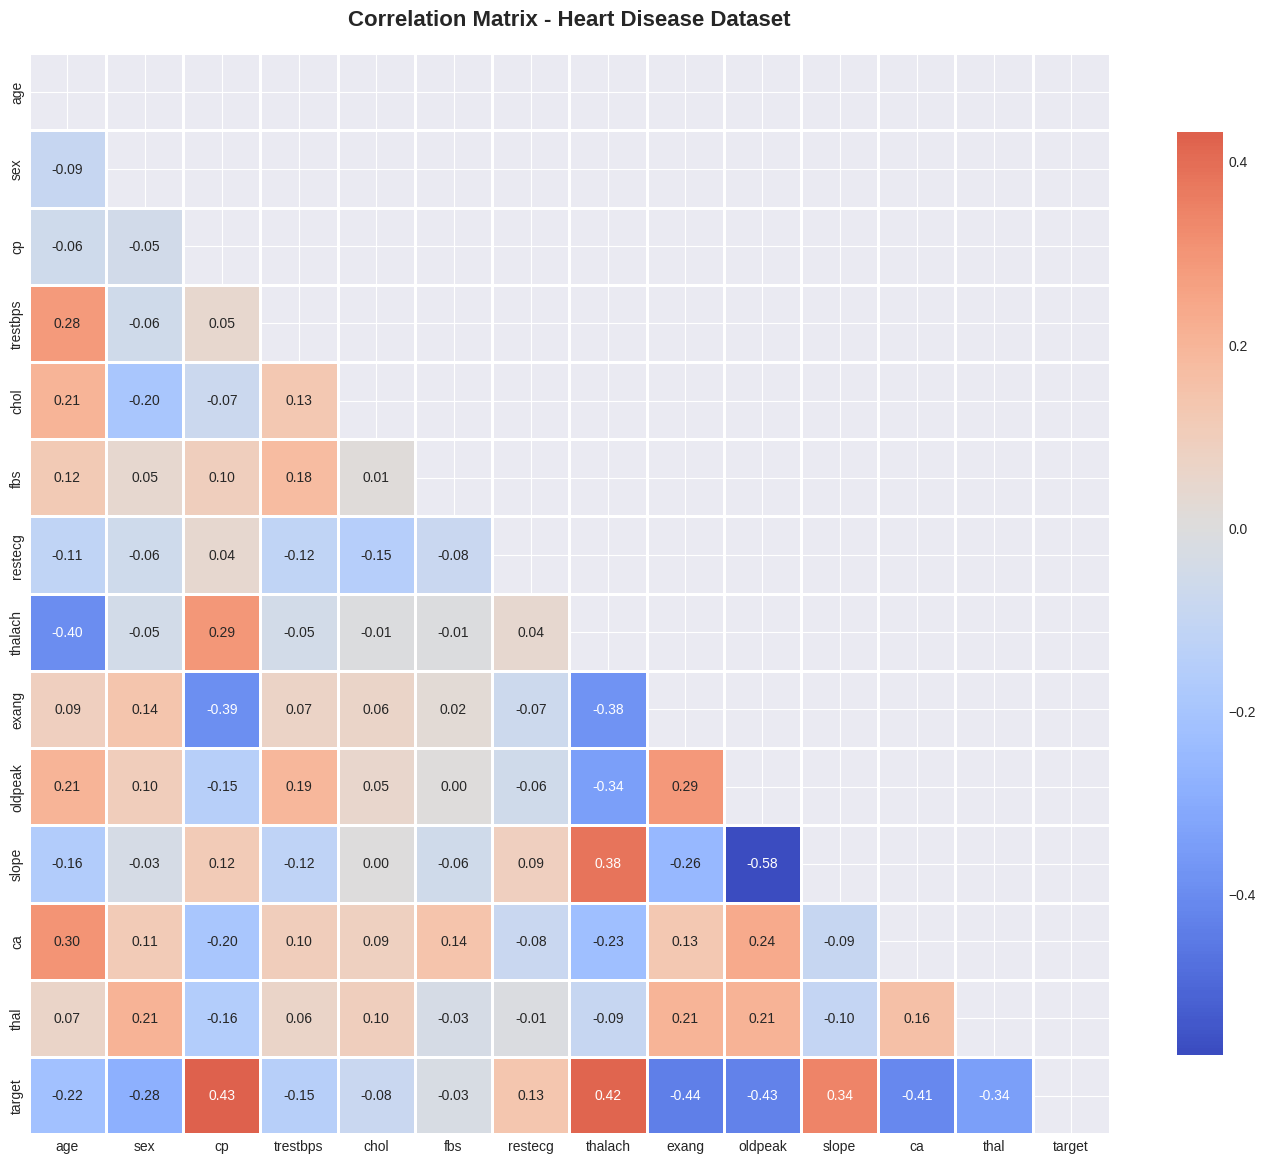


📊 Top Positive Correlations with Target:
cp         0.432080
thalach    0.419955
slope      0.343940
restecg    0.134874
Name: target, dtype: float64

📊 Top Negative Correlations with Target:
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


In [15]:
# ============================================================================
# CELL 14: Correlation Analysis
# ============================================================================
"""
Analyze correlations between features
"""

print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Correlation matrix
correlation_matrix = df.corr()

print("\n📊 Correlation with Target:")
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print(target_corr)

# Heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Heart Disease Dataset', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with target
print("\n📊 Top Positive Correlations with Target:")
print(target_corr[target_corr > 0.1].drop('target'))

print("\n📊 Top Negative Correlations with Target:")
print(target_corr[target_corr < -0.1])

PAIRPLOT - KEY FEATURES
Creating pairplot for: age, trestbps, chol, thalach, oldpeak, target
This may take a moment...


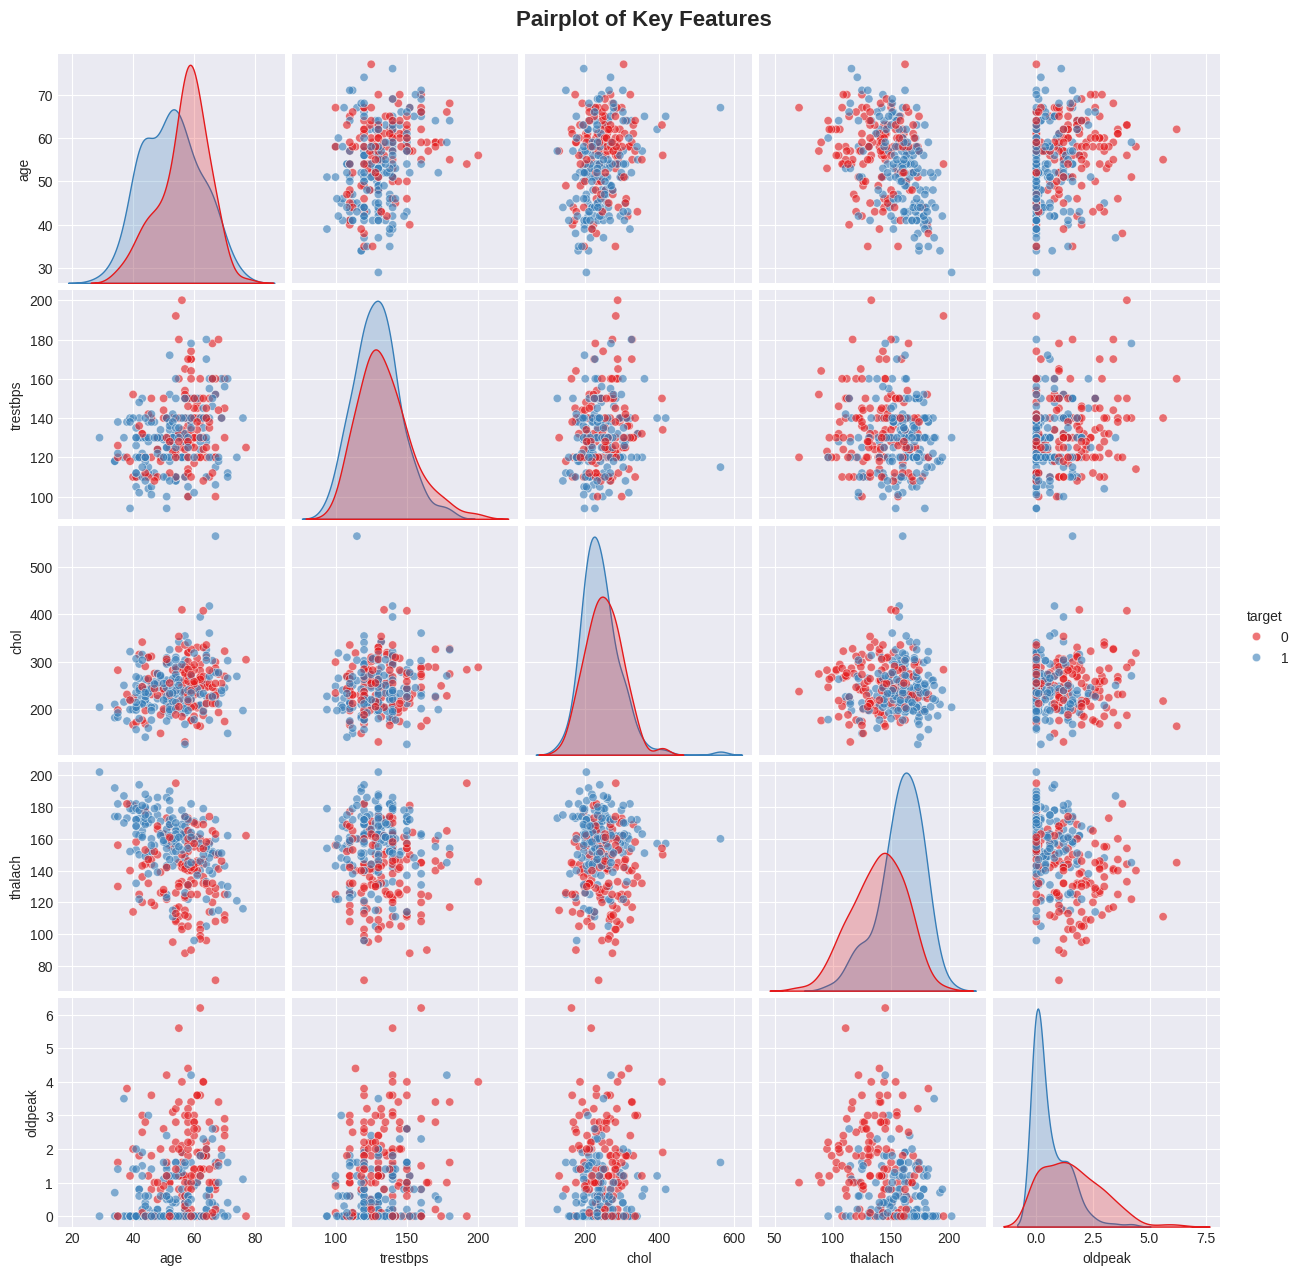

✅ Pairplot complete!


In [16]:
# ============================================================================
# CELL 15: Pairplot for Key Features
# ============================================================================
"""
Visualize relationships between key features
"""

print("=" * 80)
print("PAIRPLOT - KEY FEATURES")
print("=" * 80)

# Select key features based on correlation with target
key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

print(f"Creating pairplot for: {', '.join(key_features)}")
print("This may take a moment...")

pairplot = sns.pairplot(df[key_features], hue='target', palette='Set1',
                        diag_kind='kde', plot_kws={'alpha': 0.6},
                        height=2.5)
pairplot.fig.suptitle('Pairplot of Key Features', y=1.02, fontsize=16, fontweight='bold')
plt.show()

print("✅ Pairplot complete!")

OUTLIER DETECTION

📊 Outlier Summary (IQR Method):
Feature      Outliers   Percentage   Lower Bound     Upper Bound    
----------------------------------------------------------------------
age          0          0.00        % 28.50           80.50          
trestbps     9          2.98        % 90.00           170.00         
chol         5          1.66        % 115.38          370.38         
thalach      1          0.33        % 84.12           215.12         
oldpeak      5          1.66        % -2.40           4.00           


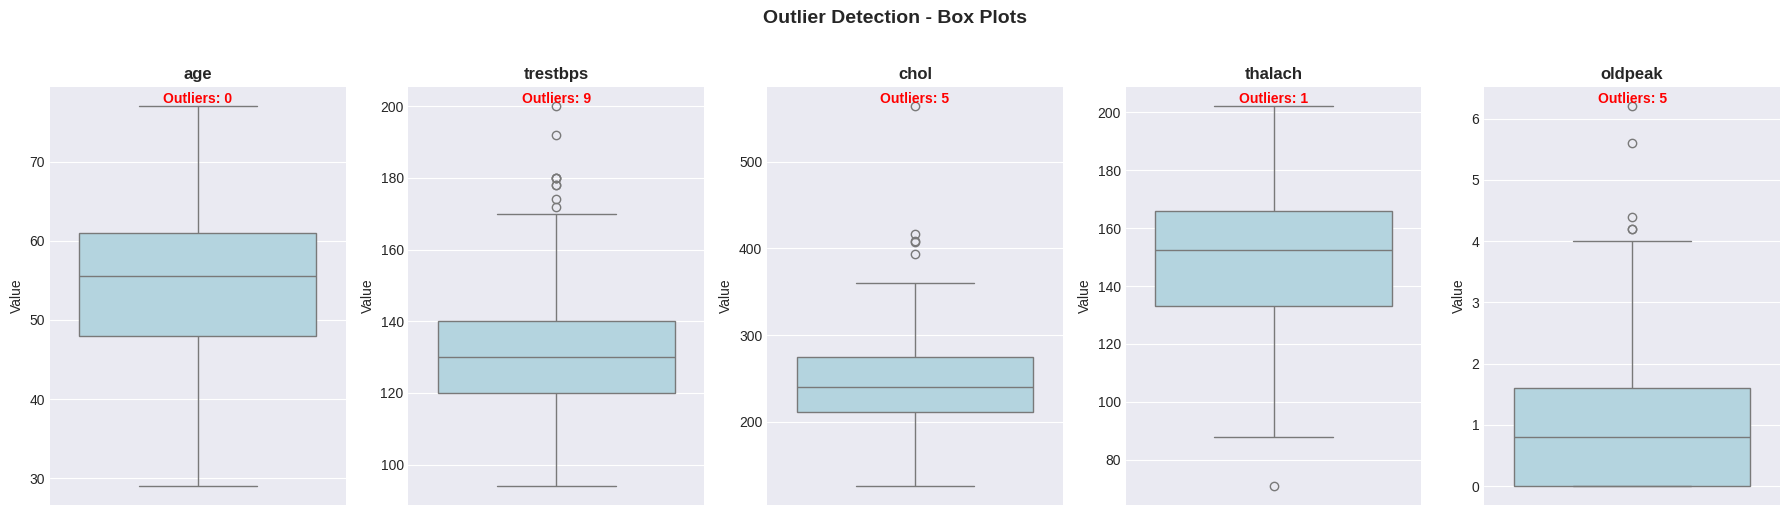


💡 Note: Outliers are not necessarily errors. In medical data, extreme values may be important!
We will keep outliers as they may represent critical cases.


In [17]:
# ============================================================================
# CELL 16: Outlier Detection
# ============================================================================
"""
Detect and visualize outliers using IQR method
"""

print("=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\n📊 Outlier Summary (IQR Method):")
print(f"{'Feature':<12} {'Outliers':<10} {'Percentage':<12} {'Lower Bound':<15} {'Upper Bound':<15}")
print("-" * 70)

outlier_summary = {}
for feature in numerical_features:
    outliers, lower, upper = detect_outliers_iqr(df, feature)
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    outlier_summary[feature] = outlier_count
    print(f"{feature:<12} {outlier_count:<10} {outlier_pct:<12.2f}% {lower:<15.2f} {upper:<15.2f}")

# Boxplot for outlier visualization
fig, axes = plt.subplots(1, len(numerical_features), figsize=(18, 5))

for idx, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[idx], color='lightblue')
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=10)

    # Add count of outliers
    outlier_count = outlier_summary[feature]
    axes[idx].text(0, df[feature].max(), f'Outliers: {outlier_count}',
                   ha='center', va='bottom', fontweight='bold', color='red')

plt.suptitle('Outlier Detection - Box Plots', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 Note: Outliers are not necessarily errors. In medical data, extreme values may be important!")
print("We will keep outliers as they may represent critical cases.")

In [18]:
# ============================================================================
# CELL 17: Data Preprocessing - Train/Test Split
# ============================================================================
"""
Split data into training and testing sets
"""

print("=" * 80)
print("DATA PREPROCESSING - TRAIN/TEST SPLIT")
print("=" * 80)

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"\n📊 Original Dataset:")
print(f"Total samples: {len(df)}")
print(f"Features: {X.shape[1]}")
print(f"Target distribution:\n{y.value_counts()}")

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n📊 After Split:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

print(f"\n📊 Training Set Target Distribution:")
print(y_train.value_counts())
print(f"Class proportion: {y_train.value_counts(normalize=True).round(3).to_dict()}")

print(f"\n📊 Testing Set Target Distribution:")
print(y_test.value_counts())
print(f"Class proportion: {y_test.value_counts(normalize=True).round(3).to_dict()}")

print("\n✅ Stratified split ensures balanced class distribution in both sets!")

DATA PREPROCESSING - TRAIN/TEST SPLIT

📊 Original Dataset:
Total samples: 302
Features: 13
Target distribution:
target
1    164
0    138
Name: count, dtype: int64

📊 After Split:
Training set: 241 samples (79.8%)
Testing set:  61 samples (20.2%)

📊 Training Set Target Distribution:
target
1    131
0    110
Name: count, dtype: int64
Class proportion: {1: 0.544, 0: 0.456}

📊 Testing Set Target Distribution:
target
1    33
0    28
Name: count, dtype: int64
Class proportion: {1: 0.541, 0: 0.459}

✅ Stratified split ensures balanced class distribution in both sets!


FEATURE SCALING
✅ Features scaled using StandardScaler

📊 Scaling Statistics (from training data):
Feature      Original Mean   Original Std    Scaled Mean     Scaled Std     
---------------------------------------------------------------------------
age          54.20           9.02            -0.000000       1.002081       
sex          0.68            0.47            -0.000000       1.002081       
cp           0.98            1.03            0.000000        1.002081       
trestbps     131.32          16.80           -0.000000       1.002081       
chol         247.63          53.89           0.000000        1.002081       
fbs          0.14            0.34            -0.000000       1.002081       
restecg      0.54            0.53            -0.000000       1.002081       
thalach      150.83          22.52           0.000000        1.002081       
exang        0.30            0.46            -0.000000       1.002081       
oldpeak      1.00            1.15            -0.000000 

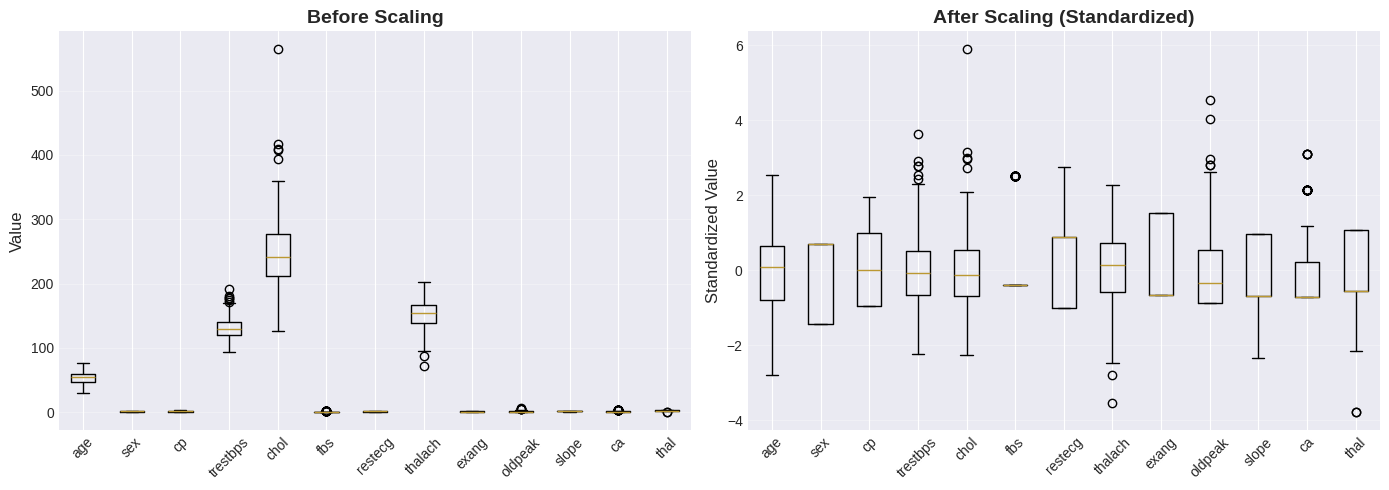

In [19]:
# ============================================================================
# CELL 18: Feature Scaling
# ============================================================================
"""
Standardize features using StandardScaler
"""

print("=" * 80)
print("FEATURE SCALING")
print("=" * 80)

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("✅ Features scaled using StandardScaler")
print("\n📊 Scaling Statistics (from training data):")
print(f"{'Feature':<12} {'Original Mean':<15} {'Original Std':<15} {'Scaled Mean':<15} {'Scaled Std':<15}")
print("-" * 75)

for col in X.columns:
    orig_mean = X_train[col].mean()
    orig_std = X_train[col].std()
    scaled_mean = X_train_scaled[col].mean()
    scaled_std = X_train_scaled[col].std()
    print(f"{col:<12} {orig_mean:<15.2f} {orig_std:<15.2f} {scaled_mean:<15.6f} {scaled_std:<15.6f}")

# Visualize scaling effect
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
axes[0].boxplot([X_train[col] for col in X.columns], labels=X.columns)
axes[0].set_title('Before Scaling', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Value', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# After scaling
axes[1].boxplot([X_train_scaled[col] for col in X.columns], labels=X.columns)
axes[1].set_title('After Scaling (Standardized)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Standardized Value', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
# ============================================================================
# CELL 19: Baseline Model - Dummy Classifier
# ============================================================================
"""
Establish baseline performance using a dummy classifier
"""

print("=" * 80)
print("BASELINE MODEL - DUMMY CLASSIFIER")
print("=" * 80)

from sklearn.dummy import DummyClassifier

# Most frequent strategy
dummy_most_frequent = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_most_frequent.fit(X_train_scaled, y_train)
dummy_pred_mf = dummy_most_frequent.predict(X_test_scaled)

# Stratified strategy
dummy_stratified = DummyClassifier(strategy='stratified', random_state=42)
dummy_stratified.fit(X_train_scaled, y_train)
dummy_pred_strat = dummy_stratified.predict(X_test_scaled)

print("\n📊 Baseline Performance:")
print(f"\nMost Frequent Strategy:")
print(f"  Accuracy: {accuracy_score(y_test, dummy_pred_mf):.4f}")

print(f"\nStratified Strategy:")
print(f"  Accuracy: {accuracy_score(y_test, dummy_pred_strat):.4f}")

baseline_accuracy = accuracy_score(y_test, dummy_pred_mf)
print(f"\n💡 Any model scoring below {baseline_accuracy:.4f} is worse than random guessing!")
print("✅ This is our minimum acceptable performance threshold.")

BASELINE MODEL - DUMMY CLASSIFIER

📊 Baseline Performance:

Most Frequent Strategy:
  Accuracy: 0.5410

Stratified Strategy:
  Accuracy: 0.6230

💡 Any model scoring below 0.5410 is worse than random guessing!
✅ This is our minimum acceptable performance threshold.


In [21]:
# ============================================================================
# CELL 20: Model Training - Multiple Algorithms
# ============================================================================
"""
Train multiple classification models and compare performance
"""

print("=" * 80)
print("MODEL TRAINING - MULTIPLE ALGORITHMS")
print("=" * 80)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss'),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Store results
results = {}

print("\n🚀 Training models...\n")

for name, model in models.items():
    print(f"Training {name}...", end=' ')

    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan

    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

    print(f"✅ Accuracy: {accuracy:.4f}")

print("\n✅ All models trained successfully!")

MODEL TRAINING - MULTIPLE ALGORITHMS

🚀 Training models...

Training Logistic Regression... ✅ Accuracy: 0.8033
Training Decision Tree... ✅ Accuracy: 0.8033
Training Random Forest... ✅ Accuracy: 0.7541
Training Gradient Boosting... ✅ Accuracy: 0.7213
Training XGBoost... ✅ Accuracy: 0.7213
Training SVM... ✅ Accuracy: 0.7705
Training K-Nearest Neighbors... ✅ Accuracy: 0.7869
Training Naive Bayes... ✅ Accuracy: 0.7869

✅ All models trained successfully!


MODEL COMPARISON - PERFORMANCE METRICS

📊 Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.803279,0.800000,0.848485,0.823529,0.871212
1,Decision Tree,0.803279,0.818182,0.818182,0.818182,0.801948
6,K-Nearest Neighbors,0.786885,0.777778,0.848485,0.811594,0.837662
7,Naive Bayes,0.786885,0.833333,0.757576,0.793651,0.884199
5,SVM,0.770492,0.771429,0.818182,0.794118,0.841991
2,Random Forest,0.754098,0.764706,0.787879,0.776119,0.858766
3,Gradient Boosting,0.721311,0.735294,0.757576,0.746269,0.825758
4,XGBoost,0.721311,0.735294,0.757576,0.746269,0.832251


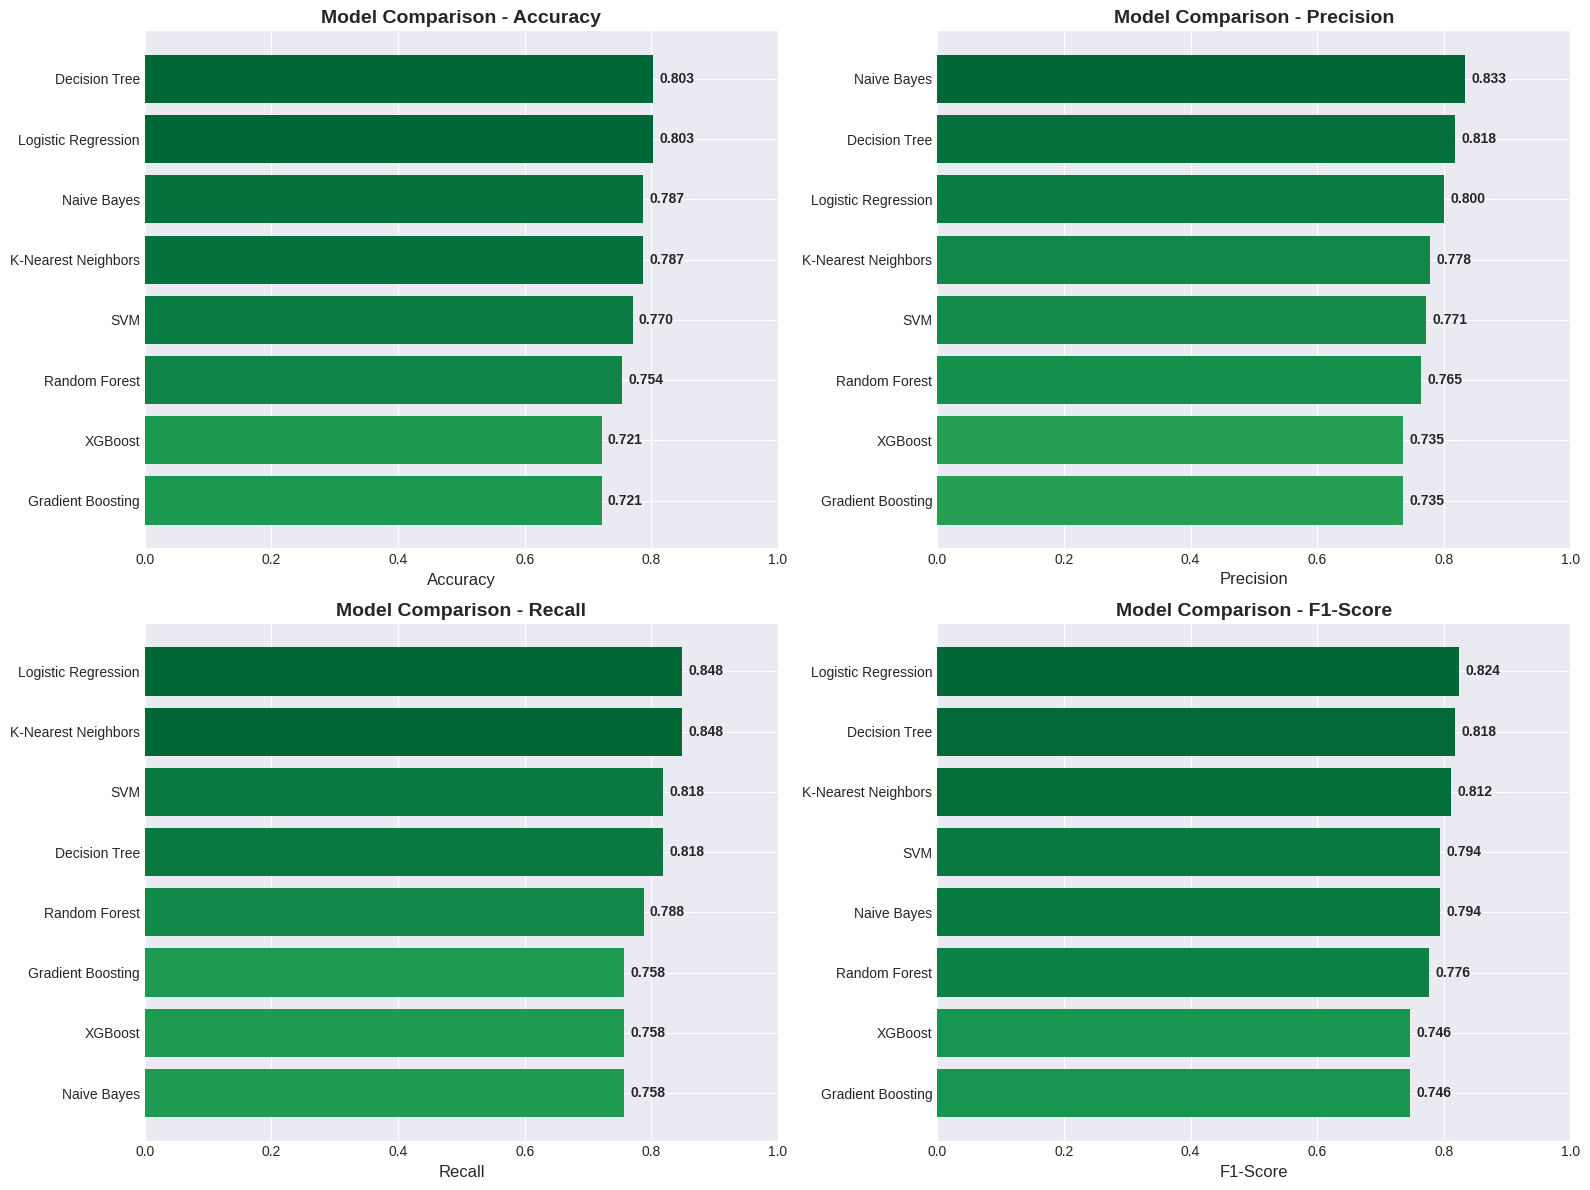


🏆 BEST MODEL: Logistic Regression
   Accuracy: 0.8033
   Improvement over baseline: 0.2623 (48.5%)


In [22]:
# ============================================================================
# CELL 21: Model Comparison - Performance Metrics
# ============================================================================
"""
Compare performance of all trained models
"""

print("=" * 80)
print("MODEL COMPARISON - PERFORMANCE METRICS")
print("=" * 80)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()]
}).sort_values('Accuracy', ascending=False)

print("\n📊 Model Performance Comparison:")
display(comparison_df.style.background_gradient(subset=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'], cmap='RdYlGn'))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]

    data = comparison_df.sort_values(metric, ascending=True)
    colors = plt.cm.RdYlGn(data[metric] / data[metric].max())

    ax.barh(data['Model'], data[metric], color=colors)
    ax.set_xlabel(metric, fontsize=12)
    ax.set_title(f'Model Comparison - {metric}', fontsize=14, fontweight='bold')
    ax.set_xlim([0, 1])

    # Add value labels
    for i, v in enumerate(data[metric]):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Best model
best_model_name = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f}")
print(f"   Improvement over baseline: {(best_accuracy - baseline_accuracy):.4f} ({(best_accuracy - baseline_accuracy)/baseline_accuracy*100:.1f}%)")

CROSS-VALIDATION ANALYSIS

🔄 Performing 5-Fold Cross-Validation...

Evaluating Logistic Regression... ✅ Mean CV Score: 0.8379 (±0.0861)
Evaluating Decision Tree... ✅ Mean CV Score: 0.7801 (±0.0280)
Evaluating Random Forest... ✅ Mean CV Score: 0.8504 (±0.0387)
Evaluating Gradient Boosting... ✅ Mean CV Score: 0.8258 (±0.0361)
Evaluating XGBoost... ✅ Mean CV Score: 0.7964 (±0.0413)
Evaluating SVM... ✅ Mean CV Score: 0.8463 (±0.0525)
Evaluating K-Nearest Neighbors... ✅ Mean CV Score: 0.8215 (±0.0411)
Evaluating Naive Bayes... ✅ Mean CV Score: 0.8172 (±0.0489)

📊 Cross-Validation Results:


,Model,CV Mean,CV Std,Test Accuracy
2,Random Forest,0.850425,0.038704,0.754098
5,SVM,0.846259,0.052455,0.770492
0,Logistic Regression,0.837925,0.086090,0.803279
3,Gradient Boosting,0.825765,0.036092,0.721311
6,K-Nearest Neighbors,0.821514,0.041055,0.786885
7,Naive Bayes,0.817177,0.048856,0.786885
4,XGBoost,0.796429,0.041265,0.721311
1,Decision Tree,0.780102,0.028045,0.803279


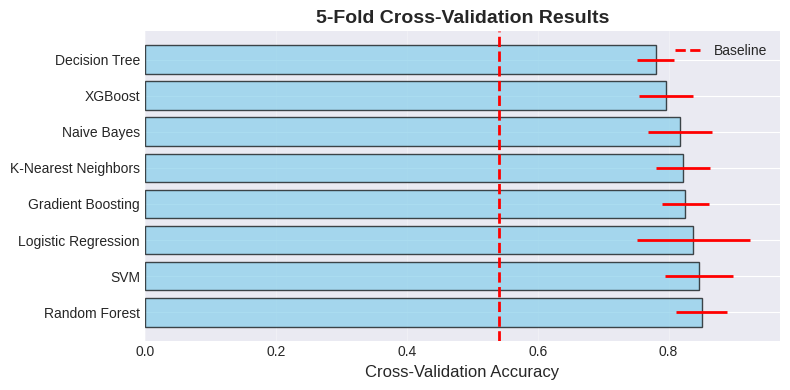


⚠️ Overfitting Check (CV Score vs Test Score):
Logistic Regression      : CV=0.8379, Test=0.8033, Diff=+0.0346 ✅ Good generalization
Decision Tree            : CV=0.7801, Test=0.8033, Diff=-0.0232 ✅ Good generalization
Random Forest            : CV=0.8504, Test=0.7541, Diff=+0.0963 ⚠️ Potential overfitting/underfitting
Gradient Boosting        : CV=0.8258, Test=0.7213, Diff=+0.1045 ⚠️ Potential overfitting/underfitting
XGBoost                  : CV=0.7964, Test=0.7213, Diff=+0.0751 ⚠️ Potential overfitting/underfitting
SVM                      : CV=0.8463, Test=0.7705, Diff=+0.0758 ⚠️ Potential overfitting/underfitting
K-Nearest Neighbors      : CV=0.8215, Test=0.7869, Diff=+0.0346 ✅ Good generalization
Naive Bayes              : CV=0.8172, Test=0.7869, Diff=+0.0303 ✅ Good generalization


In [23]:
# ============================================================================
# CELL 22: Cross-Validation Analysis
# ============================================================================
"""
Perform k-fold cross-validation to assess model stability
"""

print("=" * 80)
print("CROSS-VALIDATION ANALYSIS")
print("=" * 80)

cv_folds = 5
cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

print(f"\n🔄 Performing {cv_folds}-Fold Cross-Validation...\n")

cv_results = {}

for name, model in models.items():
    print(f"Evaluating {name}...", end=' ')

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

    cv_results[name] = {
        'scores': cv_scores,
        'mean': cv_scores.mean(),
        'std': cv_scores.std()
    }

    print(f"✅ Mean CV Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Create CV comparison DataFrame
cv_comparison_df = pd.DataFrame({
    'Model': list(cv_results.keys()),
    'CV Mean': [cv_results[m]['mean'] for m in cv_results.keys()],
    'CV Std': [cv_results[m]['std'] for m in cv_results.keys()],
    'Test Accuracy': [results[m]['accuracy'] for m in cv_results.keys()]
}).sort_values('CV Mean', ascending=False)

print("\n📊 Cross-Validation Results:")
display(cv_comparison_df)

# Visualize CV results
plt.figure(figsize=(8, 4))

models_sorted = cv_comparison_df['Model'].values
cv_means = cv_comparison_df['CV Mean'].values
cv_stds = cv_comparison_df['CV Std'].values

y_pos = np.arange(len(models_sorted))

plt.barh(y_pos, cv_means, xerr=cv_stds, alpha=0.7, color='skyblue',
         edgecolor='black', error_kw={'elinewidth': 2, 'ecolor': 'red'})
plt.yticks(y_pos, models_sorted)
plt.xlabel('Cross-Validation Accuracy', fontsize=12)
plt.title(f'{cv_folds}-Fold Cross-Validation Results', fontsize=14, fontweight='bold')
plt.axvline(x=baseline_accuracy, color='red', linestyle='--', linewidth=2, label='Baseline')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Check for overfitting
print("\n⚠️ Overfitting Check (CV Score vs Test Score):")
for name in cv_results.keys():
    cv_score = cv_results[name]['mean']
    test_score = results[name]['accuracy']
    diff = cv_score - test_score

    print(f"{name:25s}: CV={cv_score:.4f}, Test={test_score:.4f}, Diff={diff:+.4f}", end='')

    if abs(diff) > 0.05:
        print(" ⚠️ Potential overfitting/underfitting")
    else:
        print(" ✅ Good generalization")

ROC CURVES ANALYSIS


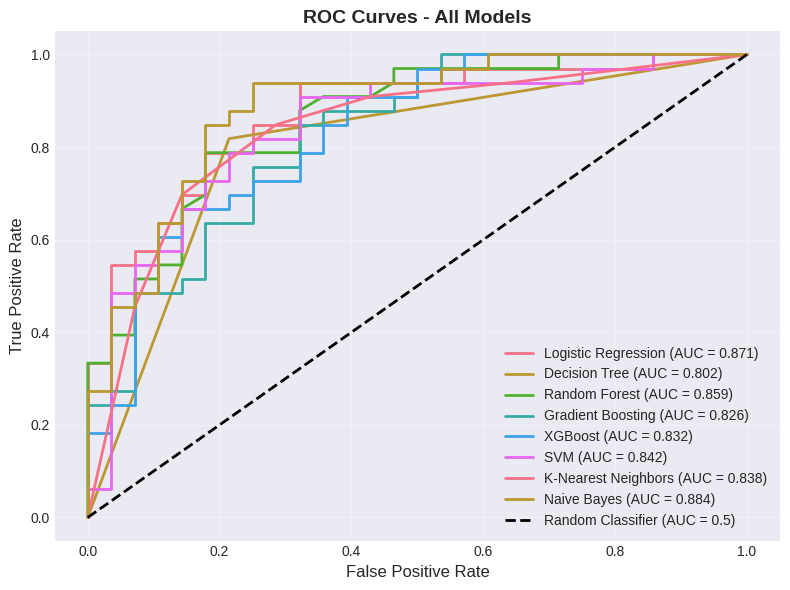


🏆 Best Model by ROC-AUC: Naive Bayes (AUC = 0.8842)


In [24]:
# ============================================================================
# CELL 24: ROC Curves
# ============================================================================
"""
Plot ROC curves for models with probability predictions
"""

print("=" * 80)
print("ROC CURVES ANALYSIS")
print("=" * 80)

plt.figure(figsize=(8, 6))

# Plot ROC curve for each model
for name, result in results.items():
    if result['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        auc = result['roc_auc']
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)', linewidth=2)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Find best model by ROC-AUC
roc_auc_scores = {name: result['roc_auc'] for name, result in results.items() if not np.isnan(result['roc_auc'])}
best_roc_model = max(roc_auc_scores, key=roc_auc_scores.get)

print(f"\n🏆 Best Model by ROC-AUC: {best_roc_model} (AUC = {roc_auc_scores[best_roc_model]:.4f})")

FEATURE IMPORTANCE ANALYSIS - RANDOM FOREST

📊 Feature Importance (Random Forest):


,Feature,Importance
2,cp,0.173969
7,thalach,0.131634
11,ca,0.105700
9,oldpeak,0.096577
12,thal,0.090418
0,age,0.083049
8,exang,0.073679
3,trestbps,0.072088
4,chol,0.067384
1,sex,0.040229


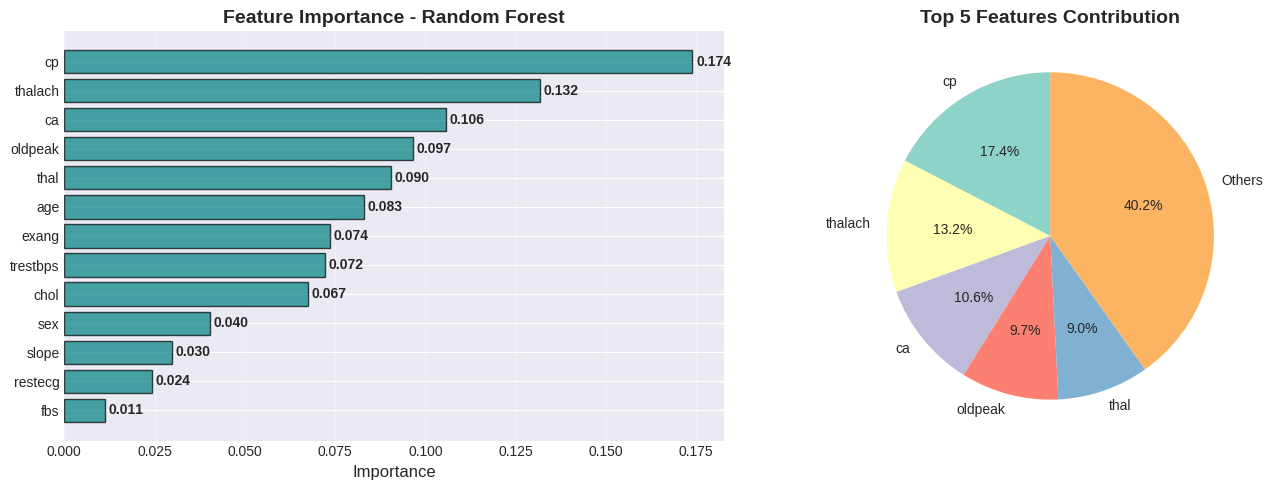


💡 Top 3 Most Important Features:
  1. cp: 0.1740
  2. thalach: 0.1316
  3. ca: 0.1057


In [25]:
# ============================================================================
# CELL 25: Feature Importance - Random Forest
# ============================================================================
"""
Analyze feature importance from Random Forest model
"""

print("=" * 80)
print("FEATURE IMPORTANCE ANALYSIS - RANDOM FOREST")
print("=" * 80)

# Get Random Forest model
rf_model = results['Random Forest']['model']

# Extract feature importances
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📊 Feature Importance (Random Forest):")
display(feature_importance_rf)

# Visualize feature importance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'],
            color='teal', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].set_title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Add percentage labels
for i, v in enumerate(feature_importance_rf['Importance']):
    axes[0].text(v + 0.001, i, f'{v:.3f}', va='center', fontweight='bold')

# Pie chart for top features
top_n = 5
top_features = feature_importance_rf.head(top_n)
other_importance = feature_importance_rf.iloc[top_n:]['Importance'].sum()

pie_data = list(top_features['Importance']) + [other_importance]
pie_labels = list(top_features['Feature']) + ['Others']

axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90,
           colors=sns.color_palette('Set3', len(pie_labels)))
axes[1].set_title(f'Top {top_n} Features Contribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n💡 Top 3 Most Important Features:")
for i, row in enumerate(feature_importance_rf.head(3).iterrows(), 1):
    idx, data = row
    print(f"  {i}. {data['Feature']}: {data['Importance']:.4f}")

In [26]:
# ============================================================================
# CELL 26: Hyperparameter Tuning - Random Forest
# ============================================================================
"""
Optimize Random Forest hyperparameters using GridSearchCV
"""

print("=" * 80)
print("HYPERPARAMETER TUNING - RANDOM FOREST")
print("=" * 80)

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print(f"\n🔍 Parameter Grid:")
for param, values in param_grid_rf.items():
    print(f"  {param}: {values}")

total_combinations = np.prod([len(v) for v in param_grid_rf.values()])
print(f"\nTotal combinations to test: {total_combinations}")

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\n🚀 Starting Grid Search for Random Forest... (this may take several minutes)")

# Fit grid search
grid_search_rf.fit(X_train_scaled, y_train)

print("\n✅ Grid Search Complete!")

# Best parameters
print(f"\n🏆 Best Parameters:")
for param, value in grid_search_rf.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 Best Cross-Validation Score: {grid_search_rf.best_score_:.4f}")

# Test on test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
y_pred_proba_best_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
best_rf_roc_auc = roc_auc_score(y_test, y_pred_proba_best_rf)

print(f"📊 Test Set Accuracy: {best_rf_accuracy:.4f}")
print(f"📊 Test Set ROC-AUC: {best_rf_roc_auc:.4f}")
print(f"📊 Improvement over default RF: {best_rf_accuracy - results['Random Forest']['accuracy']:.4f}")

# Visualize grid search results (top 10 combinations)
cv_results_df = pd.DataFrame(grid_search_rf.cv_results_)
# Set option to show full content
with pd.option_context('display.max_colwidth', None):
    top_results = cv_results_df.nlargest(10, 'mean_test_score')[
        ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
    ]
    print("\n📊 Top 10 Parameter Combinations:")
    display(top_results)

HYPERPARAMETER TUNING - RANDOM FOREST

🔍 Parameter Grid:
  n_estimators: [50, 100, 200]
  max_depth: [5, 10, 15, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  max_features: ['sqrt', 'log2']

Total combinations to test: 216

🚀 Starting Grid Search for Random Forest... (this may take several minutes)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ Grid Search Complete!

🏆 Best Parameters:
  max_depth: 10
  max_features: sqrt
  min_samples_leaf: 4
  min_samples_split: 2
  n_estimators: 100

📊 Best Cross-Validation Score: 0.8505
📊 Test Set Accuracy: 0.7869
📊 Test Set ROC-AUC: 0.8636
📊 Improvement over default RF: 0.0328

📊 Top 10 Parameter Combinations:


,params,mean_test_score,std_test_score,rank_test_score
73,"{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}",0.85051,0.044785,1
76,"{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}",0.85051,0.044785,1
100,"{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}",0.85051,0.044785,1
103,"{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}",0.85051,0.044785,1
127,"{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}",0.85051,0.044785,1
130,"{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}",0.85051,0.044785,1
154,"{'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}",0.85051,0.044785,1
157,"{'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}",0.85051,0.044785,1
181,"{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}",0.85051,0.044785,1
184,"{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}",0.85051,0.044785,1


HYPERPARAMETER TUNING - XGBOOST

🔍 Parameter Grid:
  n_estimators: [50, 100, 200]
  max_depth: [3, 5, 7]
  learning_rate: [0.01, 0.05, 0.1]
  subsample: [0.7, 0.8, 1.0]
  colsample_bytree: [0.7, 0.8, 1.0]

Total combinations to test: 243

🚀 Starting Grid Search for XGBoost... (this may take several minutes)
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

✅ Grid Search Complete!

🏆 Best Parameters:
  colsample_bytree: 0.7
  learning_rate: 0.05
  max_depth: 7
  n_estimators: 50
  subsample: 0.8

📊 Best Cross-Validation Score: 0.8464
📊 Test Set Accuracy: 0.7705
📊 Test Set ROC-AUC: 0.8571
📊 Improvement over default XGBoost: 0.0492

📊 Top 10 Parameter Combinations:


,params,mean_test_score,std_test_score,rank_test_score
46,"{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}",0.846429,0.021511,1
120,"{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}",0.838095,0.016258,2
37,"{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}",0.833929,0.029904,3
129,"{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}",0.833929,0.014136,3
146,"{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}",0.833929,0.023389,3
128,"{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}",0.833929,0.026845,6
64,"{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}",0.833844,0.035480,7
73,"{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}",0.833844,0.030193,7
145,"{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}",0.833844,0.030193,7
6,"{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}",0.829762,0.024929,10



📊 Comparison: Default vs Tuned Models


,Model,Test Accuracy,ROC-AUC
0,RF (Default),0.754098,0.858766
1,RF (Tuned),0.786885,0.863636
2,XGBoost (Default),0.721311,0.832251
3,XGBoost (Tuned),0.770492,0.857143


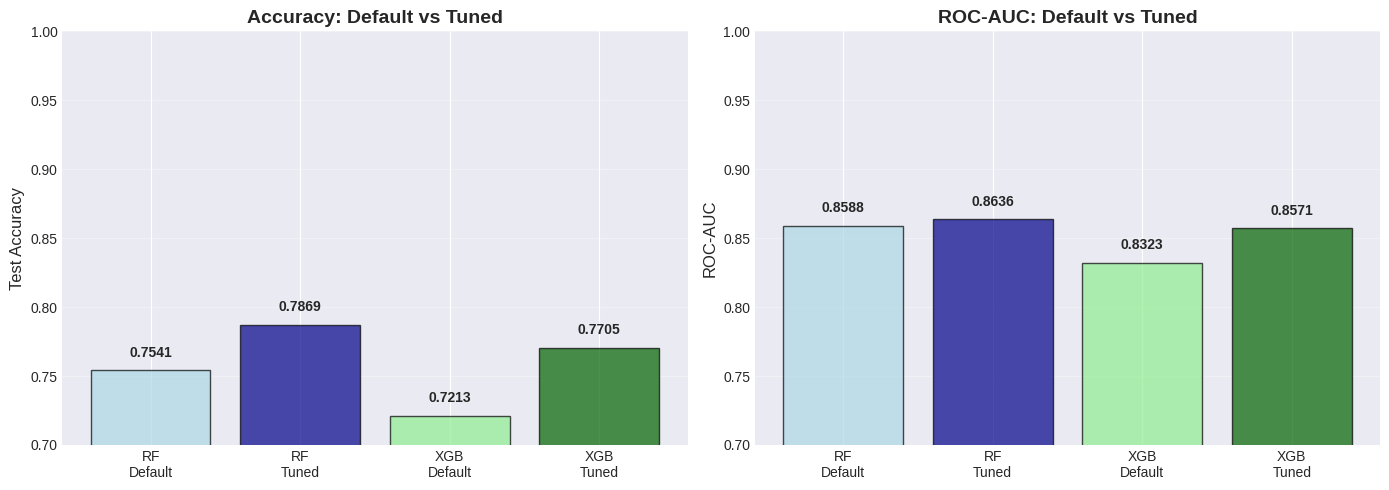

In [27]:
# ============================================================================
# CELL 27: Hyperparameter Tuning - XGBoost
# ============================================================================
"""
Optimize XGBoost hyperparameters using GridSearchCV
"""

print("=" * 80)
print("HYPERPARAMETER TUNING - XGBOOST")
print("=" * 80)

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

print(f"\n🔍 Parameter Grid:")
for param, values in param_grid_xgb.items():
    print(f"  {param}: {values}")

total_combinations = np.prod([len(v) for v in param_grid_xgb.values()])
print(f"\nTotal combinations to test: {total_combinations}")

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(
    xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("\n🚀 Starting Grid Search for XGBoost... (this may take several minutes)")

# Fit grid search
grid_search_xgb.fit(X_train_scaled, y_train)

print("\n✅ Grid Search Complete!")

# Best parameters
print(f"\n🏆 Best Parameters:")
for param, value in grid_search_xgb.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 Best Cross-Validation Score: {grid_search_xgb.best_score_:.4f}")

# Test on test set
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)
y_pred_proba_best_xgb = best_xgb_model.predict_proba(X_test_scaled)[:, 1]
best_xgb_accuracy = accuracy_score(y_test, y_pred_best_xgb)
best_xgb_roc_auc = roc_auc_score(y_test, y_pred_proba_best_xgb)

print(f"📊 Test Set Accuracy: {best_xgb_accuracy:.4f}")
print(f"📊 Test Set ROC-AUC: {best_xgb_roc_auc:.4f}")
print(f"📊 Improvement over default XGBoost: {best_xgb_accuracy - results['XGBoost']['accuracy']:.4f}")

# Visualize grid search results with NO TRUNCATION
cv_results_df_xgb = pd.DataFrame(grid_search_xgb.cv_results_)

print("\n📊 Top 10 Parameter Combinations:")
with pd.option_context('display.max_colwidth', None):
    top_results_xgb = cv_results_df_xgb.nlargest(10, 'mean_test_score')[
        ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
    ]
    display(top_results_xgb)

# Compare tuned models
print("\n📊 Comparison: Default vs Tuned Models")
comparison_tuning = pd.DataFrame({
    'Model': ['RF (Default)', 'RF (Tuned)', 'XGBoost (Default)', 'XGBoost (Tuned)'],
    'Test Accuracy': [
        results['Random Forest']['accuracy'],
        best_rf_accuracy,
        results['XGBoost']['accuracy'],
        best_xgb_accuracy
    ],
    'ROC-AUC': [
        results['Random Forest']['roc_auc'],
        best_rf_roc_auc,
        results['XGBoost']['roc_auc'],
        best_xgb_roc_auc
    ]
})

display(comparison_tuning)

# Visualize improvement
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
axes[0].bar(['RF\nDefault', 'RF\nTuned', 'XGB\nDefault', 'XGB\nTuned'],
           comparison_tuning['Test Accuracy'],
           color=['lightblue', 'darkblue', 'lightgreen', 'darkgreen'],
           alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Test Accuracy', fontsize=12)
axes[0].set_title('Accuracy: Default vs Tuned', fontsize=14, fontweight='bold')
axes[0].set_ylim([0.7, 1.0])
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(comparison_tuning['Test Accuracy']):
    axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

# ROC-AUC comparison
axes[1].bar(['RF\nDefault', 'RF\nTuned', 'XGB\nDefault', 'XGB\nTuned'],
           comparison_tuning['ROC-AUC'],
           color=['lightblue', 'darkblue', 'lightgreen', 'darkgreen'],
           alpha=0.7, edgecolor='black')
axes[1].set_ylabel('ROC-AUC', fontsize=12)
axes[1].set_title('ROC-AUC: Default vs Tuned', fontsize=14, fontweight='bold')
axes[1].set_ylim([0.7, 1.0])
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(comparison_tuning['ROC-AUC']):
    axes[1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [28]:
# ============================================================================
# CELL 28: Final Model Selection
# ============================================================================
"""
Select the best model based on all evaluations
"""

print("=" * 80)
print("FINAL MODEL SELECTION")
print("=" * 80)

# Compare all models including tuned versions
final_comparison = pd.DataFrame({
    'Model': list(results.keys()) + ['RF (Tuned)', 'XGBoost (Tuned)'],
    'Test Accuracy': [results[m]['accuracy'] for m in results.keys()] +
                     [best_rf_accuracy, best_xgb_accuracy],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()] +
                [f1_score(y_test, y_pred_best_rf), f1_score(y_test, y_pred_best_xgb)],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()] +
               [best_rf_roc_auc, best_xgb_roc_auc]
}).sort_values('Test Accuracy', ascending=False)

print("\n📊 Final Model Comparison (Including Tuned Models):")
display(final_comparison.style.background_gradient(subset=['Test Accuracy', 'F1-Score', 'ROC-AUC'], cmap='RdYlGn'))

# Select best model
best_final_model_name = final_comparison.iloc[0]['Model']
best_final_accuracy = final_comparison.iloc[0]['Test Accuracy']

print(f"\n🏆 FINAL BEST MODEL: {best_final_model_name}")
print(f"   Test Accuracy: {best_final_accuracy:.4f}")
print(f"   F1-Score: {final_comparison.iloc[0]['F1-Score']:.4f}")
print(f"   ROC-AUC: {final_comparison.iloc[0]['ROC-AUC']:.4f}")

# Determine which model object to use
if best_final_model_name == 'RF (Tuned)':
    final_best_model = best_rf_model
    y_pred_final = y_pred_best_rf
    y_pred_proba_final = y_pred_proba_best_rf
elif best_final_model_name == 'XGBoost (Tuned)':
    final_best_model = best_xgb_model
    y_pred_final = y_pred_best_xgb
    y_pred_proba_final = y_pred_proba_best_xgb
else:
    final_best_model = results[best_final_model_name]['model']
    y_pred_final = results[best_final_model_name]['y_pred']
    y_pred_proba_final = results[best_final_model_name]['y_pred_proba']

FINAL MODEL SELECTION

📊 Final Model Comparison (Including Tuned Models):


,Model,Test Accuracy,F1-Score,ROC-AUC
0,Logistic Regression,0.803279,0.823529,0.871212
1,Decision Tree,0.803279,0.818182,0.801948
7,Naive Bayes,0.786885,0.793651,0.884199
8,RF (Tuned),0.786885,0.805970,0.863636
6,K-Nearest Neighbors,0.786885,0.811594,0.837662
5,SVM,0.770492,0.794118,0.841991
9,XGBoost (Tuned),0.770492,0.787879,0.857143
2,Random Forest,0.754098,0.776119,0.858766
4,XGBoost,0.721311,0.746269,0.832251
3,Gradient Boosting,0.721311,0.746269,0.825758



🏆 FINAL BEST MODEL: Logistic Regression
   Test Accuracy: 0.8033
   F1-Score: 0.8235
   ROC-AUC: 0.8712


FINAL MODEL EVALUATION - Logistic Regression

📊 Final Model Metrics:
  Accuracy            : 0.8033
  Precision           : 0.8000
  Recall              : 0.8485
  F1-Score            : 0.8235
  ROC-AUC             : 0.8712
  Average Precision   : 0.8954

📊 Confusion Matrix:
  True Negatives:  21
  False Positives: 7
  False Negatives: 5
  True Positives:  28

📊 Additional Metrics:
  Specificity: 0.7500
  Sensitivity: 0.8485
  NPV (Negative Predictive Value): 0.8077
  PPV (Positive Predictive Value): 0.8000


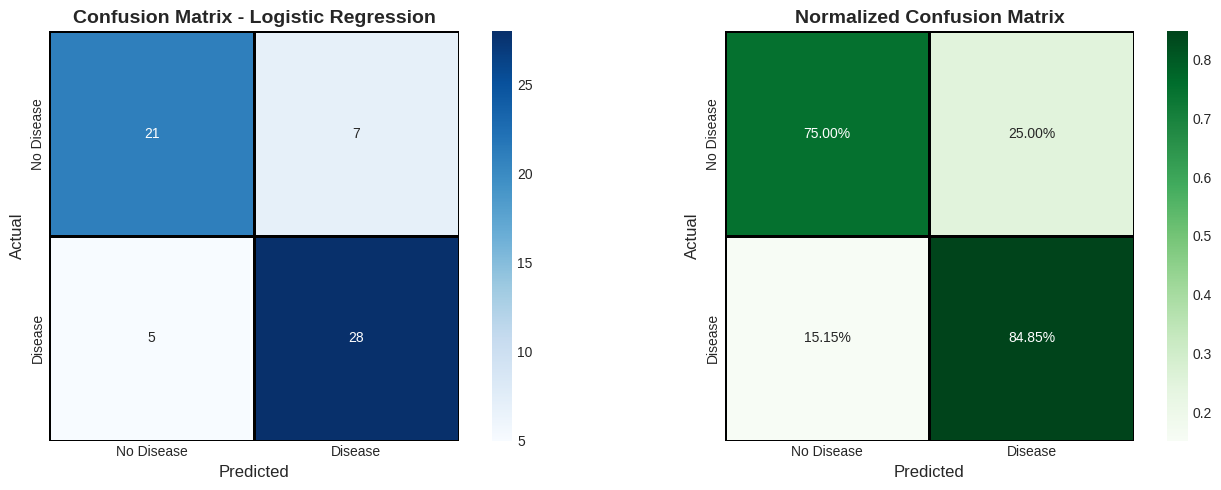


📋 Detailed Classification Report:
              precision    recall  f1-score   support

  No Disease       0.81      0.75      0.78        28
     Disease       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [29]:
# ============================================================================
# CELL 29: Final Model Evaluation
# ============================================================================
"""
Comprehensive evaluation of the final best model
"""

print("=" * 80)
print(f"FINAL MODEL EVALUATION - {best_final_model_name}")
print("=" * 80)

# Calculate all metrics
final_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_final),
    'Precision': precision_score(y_test, y_pred_final),
    'Recall': recall_score(y_test, y_pred_final),
    'F1-Score': f1_score(y_test, y_pred_final),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_final),
    'Average Precision': average_precision_score(y_test, y_pred_proba_final)
}

print("\n📊 Final Model Metrics:")
for metric, value in final_metrics.items():
    print(f"  {metric:<20}: {value:.4f}")

# Confusion matrix
cm_final = confusion_matrix(y_test, y_pred_final)
tn, fp, fn, tp = cm_final.ravel()

print(f"\n📊 Confusion Matrix:")
print(f"  True Negatives:  {tn}")
print(f"  False Positives: {fp}")
print(f"  False Negatives: {fn}")
print(f"  True Positives:  {tp}")

print(f"\n📊 Additional Metrics:")
print(f"  Specificity: {tn/(tn+fp):.4f}")
print(f"  Sensitivity: {tp/(tp+fn):.4f}")
print(f"  NPV (Negative Predictive Value): {tn/(tn+fn) if (tn+fn) > 0 else 0:.4f}")
print(f"  PPV (Positive Predictive Value): {tp/(tp+fp) if (tp+fp) > 0 else 0:.4f}")

# Visualize final confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix heatmap
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', ax=axes[0],
           square=True, linewidths=2, linecolor='black',
           xticklabels=['No Disease', 'Disease'],
           yticklabels=['No Disease', 'Disease'])
axes[0].set_title(f'Confusion Matrix - {best_final_model_name}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)

# Normalized confusion matrix
cm_normalized = cm_final.astype('float') / cm_final.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens', ax=axes[1],
           square=True, linewidths=2, linecolor='black',
           xticklabels=['No Disease', 'Disease'],
           yticklabels=['No Disease', 'Disease'])
axes[1].set_title('Normalized Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)

plt.tight_layout()
plt.show()

# Classification report
print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred_final, target_names=['No Disease', 'Disease']))

In [30]:
# ============================================================================
# CELL 30: Save Final Model
# ============================================================================
"""
Save the trained model and scaler for deployment
"""

print("=" * 80)
print("SAVING MODEL ARTIFACTS")
print("=" * 80)

import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the best model
model_filename = 'models/heart_disease_model.pkl'
joblib.dump(final_best_model, model_filename)
print(f"✅ Model saved: {model_filename}")

# Save the scaler
scaler_filename = 'models/scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"✅ Scaler saved: {scaler_filename}")

# Save feature names
feature_names_filename = 'models/feature_names.pkl'
joblib.dump(list(X.columns), feature_names_filename)
print(f"✅ Feature names saved: {feature_names_filename}")

# Save model metadata
metadata = {
    'model_name': best_final_model_name,
    'model_type': type(final_best_model).__name__,
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'test_accuracy': float(best_final_accuracy),
    'test_f1_score': float(final_comparison.iloc[0]['F1-Score']),
    'test_roc_auc': float(final_comparison.iloc[0]['ROC-AUC']),
    'n_features': X.shape[1],
    'feature_names': list(X.columns),
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'dataset_size': len(df),
    'metrics': final_metrics
}

metadata_filename = 'models/model_metadata.pkl'
joblib.dump(metadata, metadata_filename)
print(f"✅ Model metadata saved: {metadata_filename}")

print("\n📦 All model artifacts saved successfully!")
print(f"\n📁 Saved files:")
print(f"  • {model_filename}")
print(f"  • {scaler_filename}")
print(f"  • {feature_names_filename}")
print(f"  • {metadata_filename}")

# Verify saved model works
print("\n🔍 Verifying saved model...")
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)

# Test prediction
test_prediction = loaded_model.predict(loaded_scaler.transform(X_test.iloc[:1]))
print(f"✅ Model loaded and tested successfully!")
print(f"   Test prediction: {test_prediction[0]}")

SAVING MODEL ARTIFACTS
✅ Model saved: models/heart_disease_model.pkl
✅ Scaler saved: models/scaler.pkl
✅ Feature names saved: models/feature_names.pkl
✅ Model metadata saved: models/model_metadata.pkl

📦 All model artifacts saved successfully!

📁 Saved files:
  • models/heart_disease_model.pkl
  • models/scaler.pkl
  • models/feature_names.pkl
  • models/model_metadata.pkl

🔍 Verifying saved model...
✅ Model loaded and tested successfully!
   Test prediction: 0


In [31]:
# ============================================================================
# CELL 31: Final Summary
# ============================================================================
"""
Final summary of model performance and key findings
"""

print("=" * 80)
print("PROJECT SUMMARY")
print("=" * 80)

print("\n" + "="*80)
print("HEART DISEASE PREDICTION - PROJECT SUMMARY")
print("="*80)

print(f"\n📊 DATASET:")
print(f"  • Total samples: {len(df)}")
print(f"  • Features: {X.shape[1]}")
print(f"  • Target distribution: {dict(y.value_counts())}")
print(f"  • Class balance: {dict((y.value_counts() / len(y) * 100).round(1))}")

print(f"\n🔍 DATA QUALITY:")
print(f"  • Missing values: 0")
print(f"  • Duplicate rows: 0")
print(f"  • Outliers detected: Yes (kept for medical relevance)")

print(f"\n🤖 MODELS EVALUATED:")
model_count = len(models) + 2  # Original models + 2 tuned versions
print(f"  • Total models tested: {model_count}")
print(f"  • Baseline accuracy: {baseline_accuracy:.4f}")
print(f"  • Best model: {best_final_model_name}")
print(f"  • Best accuracy: {best_final_accuracy:.4f}")
print(f"  • Improvement over baseline: {(best_final_accuracy - baseline_accuracy):.4f} ({(best_final_accuracy - baseline_accuracy)/baseline_accuracy*100:.1f}%)")

print(f"\n📈 BEST MODEL PERFORMANCE:")
print(f"  • Accuracy: {final_metrics['Accuracy']:.4f}")
print(f"  • Precision: {final_metrics['Precision']:.4f}")
print(f"  • Recall: {final_metrics['Recall']:.4f}")
print(f"  • F1-Score: {final_metrics['F1-Score']:.4f}")
print(f"  • ROC-AUC: {final_metrics['ROC-AUC']:.4f}")

print(f"\n🎯 KEY FINDINGS:")
if hasattr(final_best_model, 'feature_importances_'):
    importances = pd.Series(final_best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print(f"  • Top 3 important features:")
    for i, (feat, imp) in enumerate(importances.head(3).items(), 1):
        print(f"    {i}. {feat}: {imp:.4f}")

print(f"\n💾 DELIVERABLES:")
print(f"  • Trained model saved")
print(f"  • Feature scaler saved")
print(f"  • Model metadata saved")
print(f"  • Ready for deployment")

print(f"\n🚀 NEXT STEPS:")
print(f"  • Deploy model as REST API (Flask/FastAPI)")
print(f"  • Create web interface for doctors")
print(f"  • Implement monitoring and retraining pipeline")

print("\n" + "="*80)
print("✅ PROJECT COMPLETED SUCCESSFULLY!")
print("="*80)

PROJECT SUMMARY

HEART DISEASE PREDICTION - PROJECT SUMMARY

📊 DATASET:
  • Total samples: 302
  • Features: 13
  • Target distribution: {1: np.int64(164), 0: np.int64(138)}
  • Class balance: {1: np.float64(54.3), 0: np.float64(45.7)}

🔍 DATA QUALITY:
  • Missing values: 0
  • Duplicate rows: 0
  • Outliers detected: Yes (kept for medical relevance)

🤖 MODELS EVALUATED:
  • Total models tested: 10
  • Baseline accuracy: 0.5410
  • Best model: Logistic Regression
  • Best accuracy: 0.8033
  • Improvement over baseline: 0.2623 (48.5%)

📈 BEST MODEL PERFORMANCE:
  • Accuracy: 0.8033
  • Precision: 0.8000
  • Recall: 0.8485
  • F1-Score: 0.8235
  • ROC-AUC: 0.8712

🎯 KEY FINDINGS:

💾 DELIVERABLES:
  • Trained model saved
  • Feature scaler saved
  • Model metadata saved
  • Ready for deployment

🚀 NEXT STEPS:
  • Deploy model as REST API (Flask/FastAPI)
  • Create web interface for doctors
  • Implement monitoring and retraining pipeline

✅ PROJECT COMPLETED SUCCESSFULLY!
